
# Customer Lifetime Value Prediction

### By Kristina Larissa Tjandrawijaya

## Introduction

### Latar Belakang
Dalam lanskap kompetitif industri asuransi, retensi pelanggan dan pemasaran yang ditargetkan adalah hal yang krusial untuk mempertahankan profitabilitas dan pertumbuhan. Customer Lifetime Value (CLV) adalah metrik penting yang membantu perusahaan asuransi memahami nilai jangka panjang pelanggan mereka. Prediksi CLV yang akurat memungkinkan perusahaan menyesuaikan upaya pemasaran mereka, mengoptimalkan alokasi sumber daya, dan meningkatkan kepuasan pelanggan dengan memberikan layanan yang dipersonalisasi.

### Problem Statement
Tujuan utama adalah mengembangkan model prediktif untuk memperkirakan CLV pelanggan berdasarkan berbagai faktor seperti demografi, detail polis, dan interaksi sebelumnya dengan perusahaan. Model ini akan membantu perusahaan asuransi untuk:
1. Mengidentifikasi pelanggan bernilai tinggi sejak awal hubungan mereka.
2. Mengalokasikan sumber daya pemasaran lebih efektif.
3. Menyesuaikan strategi retensi pelanggan untuk memaksimalkan pendapatan jangka panjang.
4. Mengoptimalkan strategi penetapan harga berdasarkan segmen pelanggan.

### Goals
1. Mengembangkan Model Prediktif untuk CLV: Membangun model machine learning yang secara akurat memprediksi CLV pelanggan berdasarkan data historis. Kesuksesan model ini diukur menggunakan metrik evaluasi seperti RMSE, MAE, dan MAPE.
2. Mengidentifikasi Faktor Kunci yang Mempengaruhi CLV: Menentukan fitur mana (misalnya, jumlah polis, premi bulanan, pendapatan) yang paling signifikan mempengaruhi CLV dengan menggunakan analisis feature importance.
3. Meningkatkan Strategi Pemasaran dan Retensi: Menggunakan prediksi model untuk menginformasikan strategi pemasaran dan retensi pelanggan, dengan fokus pada pelanggan bernilai tinggi. Kesuksesan strategi ini diukur dengan peningkatan retensi pelanggan dan pendapatan jangka panjang.
4. Mengoptimalkan Alokasi Sumber Daya: Mengalokasikan sumber daya pemasaran dan layanan pelanggan secara efisien berdasarkan prediksi CLV. Kesuksesan diukur dengan pengurangan biaya pemasaran dan peningkatan ROI.

### Mengapa Memprediksi CLV Penting?
1. Identifikasi Pelanggan Bernilai Tinggi: Dengan memprediksi CLV, perusahaan dapat mengidentifikasi pelanggan yang kemungkinan besar akan memberikan pendapatan jangka panjang yang signifikan. Ini memungkinkan perusahaan untuk memberikan perhatian khusus dan layanan yang lebih baik kepada pelanggan ini.
2. Pengalokasian Sumber Daya yang Efisien: Mengetahui nilai CLV memungkinkan perusahaan untuk mengalokasikan sumber daya pemasaran dan layanan pelanggan secara lebih efektif. Perusahaan dapat fokus pada pelanggan dengan nilai CLV tinggi untuk memaksimalkan ROI.
3. Pemasaran yang Dipersonalisasi: Dengan prediksi CLV, perusahaan dapat menyesuaikan strategi pemasaran dan penawaran khusus untuk berbagai segmen pelanggan, meningkatkan efektivitas kampanye pemasaran.
4. Peningkatan Retensi Pelanggan: Dengan memahami nilai jangka panjang pelanggan, perusahaan dapat mengembangkan strategi retensi yang lebih baik, mengurangi churn rate, dan meningkatkan loyalitas pelanggan.


### Dampak pada Perusahaan
1. Peningkatan Profitabilitas: Dengan fokus pada pelanggan bernilai tinggi dan mengoptimalkan upaya pemasaran, perusahaan dapat meningkatkan pendapatan jangka panjang dan profitabilitas.
Pengurangan Biaya Pemasaran: Dengan mengalokasikan sumber daya secara efisien berdasarkan prediksi CLV, perusahaan dapat mengurangi biaya pemasaran yang tidak efektif dan meningkatkan ROI.
2. Keputusan Bisnis yang Lebih Baik: Dengan data prediktif yang akurat, perusahaan dapat membuat keputusan bisnis yang lebih baik, meningkatkan kepuasan pelanggan, dan mengoptimalkan strategi penetapan harga.
3. Keunggulan Kompetitif: Perusahaan yang dapat memprediksi dan mengelola CLV dengan baik akan memiliki keunggulan kompetitif di pasar, mampu menyesuaikan dengan perubahan kebutuhan pelanggan dan kondisi pasar.


Dengan mengembangkan model prediksi CLV yang andal, perusahaan asuransi dapat meningkatkan efektivitas strategi bisnis mereka, mempertahankan pelanggan bernilai tinggi, dan mencapai pertumbuhan yang berkelanjutan.


## **Data Exploration**


In [25]:

# Load necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('data_customer_lifetime_value.csv')
df.head()



,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0,2372.155492


In [8]:
# Count and Datatype for each Column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5669 entries, 0 to 5668
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            5669 non-null   object 
 1   Coverage                 5669 non-null   object 
 2   Renew Offer Type         5669 non-null   object 
 3   EmploymentStatus         5669 non-null   object 
 4   Marital Status           5669 non-null   object 
 5   Education                5669 non-null   object 
 6   Number of Policies       5669 non-null   float64
 7   Monthly Premium Auto     5669 non-null   float64
 8   Total Claim Amount       5669 non-null   float64
 9   Income                   5669 non-null   float64
 10  Customer Lifetime Value  5669 non-null   float64
dtypes: float64(5), object(6)
memory usage: 487.3+ KB


**Table Info**

In [49]:
print(f'df shape: {df.shape}')
pd.DataFrame(
    {
    'column': df.columns.values,
    'dtype': df.dtypes.values,
    'n_missing_values': df.isna().sum(),
    '%_missing_value': df.isna().sum()/df.shape[0] * 100,
    'neg_value': [int((df[col] < 0).sum()) if (df[col].dtype == int or df[col].dtype == float) else 0 for col in df.columns],
    'n_unique': df.nunique().values,
    'sample_unique': [df[col].unique()[:10] for col in df.columns]
    }
)

df shape: (5669, 8)


,column,dtype,n_missing_values,%_missing_value,neg_value,n_unique,sample_unique
Vehicle Class,Vehicle Class,category,0,0.0,0,6,"['Four-Door Car', 'Two-Door Car', 'SUV', 'Spor..."
Renew Offer Type,Renew Offer Type,category,0,0.0,0,4,"['Offer1', 'Offer3', 'Offer2', 'Offer4'] Categ..."
Marital Status,Marital Status,category,0,0.0,0,3,"['Divorced', 'Married', 'Single'] Categories (..."
Number of Policies,Number of Policies,float64,0,0.0,0,9,"[2.0, 6.0, 1.0, 8.0, 5.0, 3.0, 7.0, 4.0, 9.0]"
Monthly Premium Auto,Monthly Premium Auto,float64,0,0.0,0,191,"[90.0, 62.0, 116.0, 107.0, 101.0, 66.0, 65.0, ..."
Total Claim Amount,Total Claim Amount,float64,0,0.0,0,3274,"[571.479602, 114.51444, 257.248789, 556.8, 355..."
Income,Income,float64,0,0.0,0,3625,"[11828.0, 44762.0, 21514.0, 17913.0, 19030.0, ..."
Customer Lifetime Value,Customer Lifetime Value,float64,0,0.0,0,5049,"[10083.48688, 4943.386117, 11981.98481, 4550.8..."


In [50]:
# Menampilkan statistik deskriptif dari dataset
print("\nStatistik deskriptif:")
print(df.describe())


Statistik deskriptif:
       Number of Policies  Monthly Premium Auto  Total Claim Amount  \
count         5669.000000           5669.000000         5669.000000   
mean             2.979361             93.026989          431.407103   
std              2.393187             34.551795          287.558038   
min              1.000000             61.000000            0.423310   
25%              1.000000             68.000000          266.932542   
50%              2.000000             82.000000          379.200000   
75%              4.000000            109.000000          549.986128   
max              9.000000            297.000000         2759.794354   

             Income  Customer Lifetime Value  
count   5669.000000              5669.000000  
mean   37868.188569              8029.874592  
std    30490.490723              6916.708246  
min        0.000000              1898.007675  
25%        0.000000              3954.344534  
50%    34322.000000              5800.188903  
75%    6

In [5]:
# Display summary statistics
df.describe()

# Check for missing values
df.isnull().sum()

Vehicle Class              0
Coverage                   0
Renew Offer Type           0
EmploymentStatus           0
Marital Status             0
Education                  0
Number of Policies         0
Monthly Premium Auto       0
Total Claim Amount         0
Income                     0
Customer Lifetime Value    0
dtype: int64

In [9]:

# Load necessary libraries
import pandas as pd

# Load the dataset
df = pd.read_csv('data_customer_lifetime_value.csv')
df.head()

# Display the first few rows of the dataset
print(df.head())

# Check the variance of numerical columns
print(df.describe())


   Vehicle Class  Coverage Renew Offer Type EmploymentStatus Marital Status  \
0  Four-Door Car  Extended           Offer1          Retired       Divorced   
1  Four-Door Car     Basic           Offer1         Employed        Married   
2   Two-Door Car     Basic           Offer1          Retired        Married   
3  Four-Door Car   Premium           Offer3         Disabled        Married   
4   Two-Door Car     Basic           Offer3    Medical Leave        Married   

              Education  Number of Policies  Monthly Premium Auto  \
0  High School or Below                 2.0                  90.0   
1               College                 6.0                  62.0   
2                Master                 2.0                  62.0   
3  High School or Below                 1.0                 116.0   
4  High School or Below                 1.0                  62.0   

   Total Claim Amount   Income  Customer Lifetime Value  
0          571.479602  11828.0             10083.486

Keterkaitan Fitur dengan Customer Lifetime Value (CLV):

Dari deskripsi statistik, terlihat bahwa jumlah polis dan premi bulanan memiliki rentang nilai yang signifikan yang mungkin berpengaruh pada nilai CLV.
Pendapatan pelanggan dan total klaim juga menunjukkan variasi yang besar yang dapat mempengaruhi prediksi CLV.
Distribusi Kategori:

Penting untuk memahami distribusi kategori untuk setiap fitur. Misalnya, dengan mengetahui mayoritas kendaraan adalah Four-Door Car, strategi pemasaran dapat disesuaikan untuk menarik pemilik kendaraan jenis ini.
Status pekerjaan dan status pernikahan juga dapat memberikan wawasan mengenai segmentasi pasar yang lebih efektif.

In [12]:

# Evaluating categorical feature distribution
categorical_features = ['Vehicle Class', 'Coverage', 'Renew Offer Type', 'EmploymentStatus', 'Marital Status', 'Education']

for feature in categorical_features:
    print(df[feature].value_counts())
    print()


Vehicle Class
Four-Door Car    2858
Two-Door Car     1186
SUV              1096
Sports Car        307
Luxury SUV        115
Luxury Car        107
Name: count, dtype: int64

Coverage
Basic       3477
Extended    1704
Premium      488
Name: count, dtype: int64

Renew Offer Type
Offer1    2292
Offer2    1835
Offer3     900
Offer4     642
Name: count, dtype: int64

EmploymentStatus
Employed         3541
Unemployed       1429
Medical Leave     267
Disabled          252
Retired           180
Name: count, dtype: int64

Marital Status
Married     3305
Single      1514
Divorced     850
Name: count, dtype: int64

Education
Bachelor                1703
College                 1660
High School or Below    1620
Master                   460
Doctor                   226
Name: count, dtype: int64



Analisis deskriptif ini memberikan gambaran umum tentang distribusi fitur kategorikal dalam dataset. Mayoritas pelanggan menggunakan mobil empat pintu dan memilih coverage dasar. Offer1 adalah penawaran yang paling sering diterima, dan distribusi status pekerjaan, status pernikahan, dan tingkat pendidikan cukup merata. Informasi ini dapat digunakan untuk memahami karakteristik dasar pelanggan dan membantu dalam pengambilan keputusan bisnis yang lebih baik.

**Visualisasi Distribusi Numerical Variabel**

Kita ingin melihat distribusi variabel numerik seperti Number of Policies, Monthly Premium Auto, Total Claim Amount, Income, dan Customer Lifetime Value. Hal ini akan membantu kita memahami pola distribusi dan mendeteksi outliers.

c:\Users\HOME\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\HOME\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\HOME\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\HOME\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

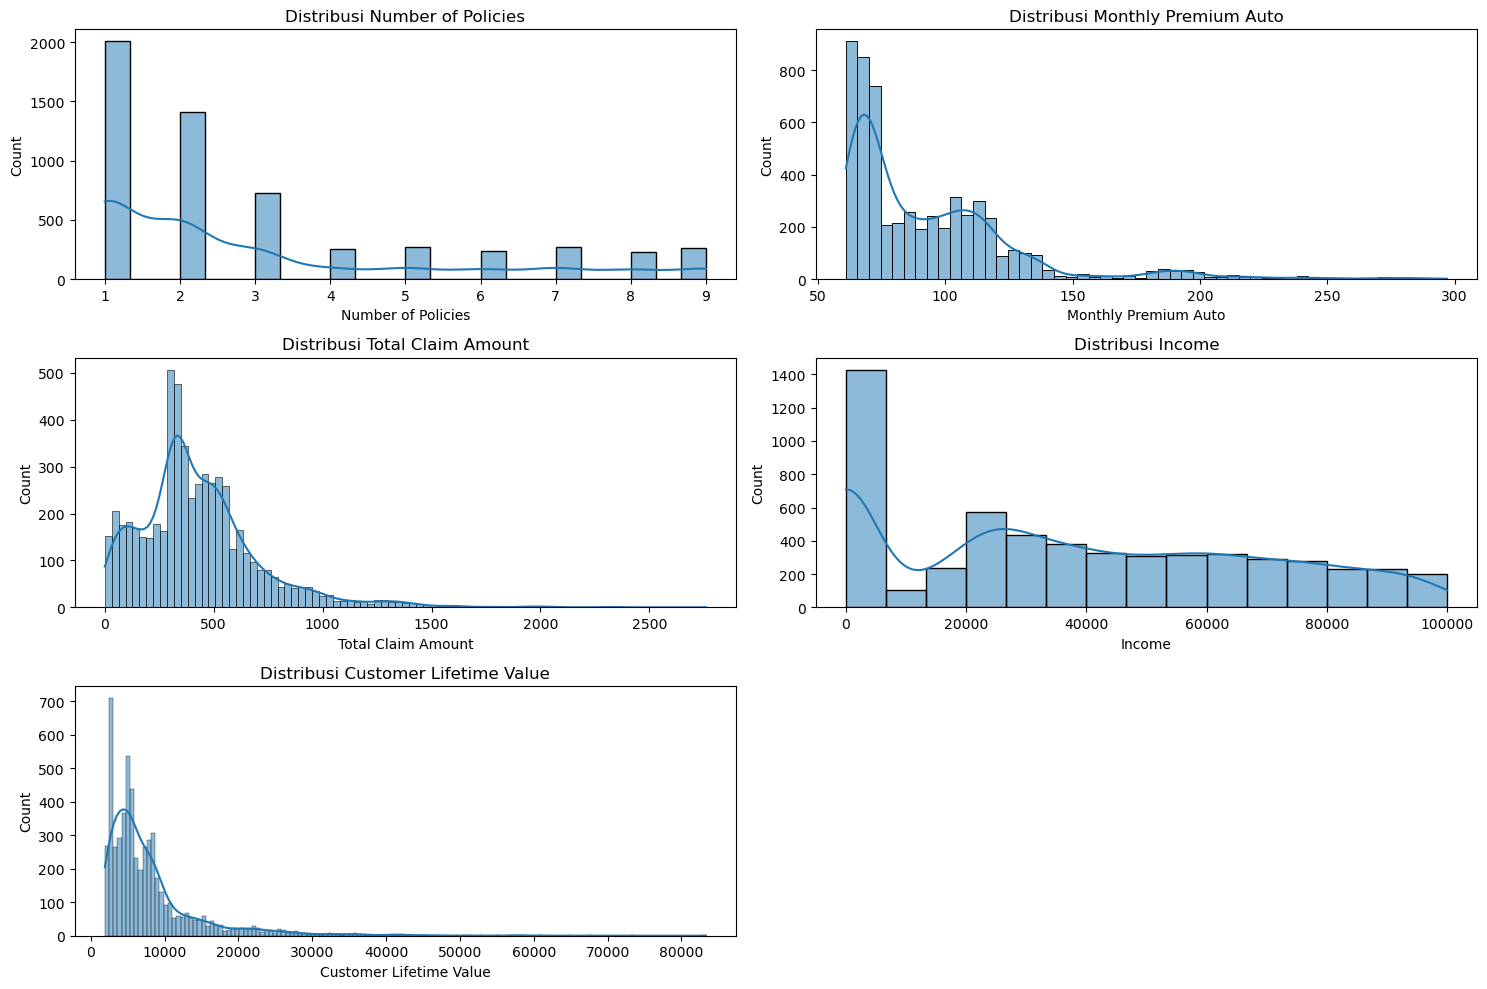

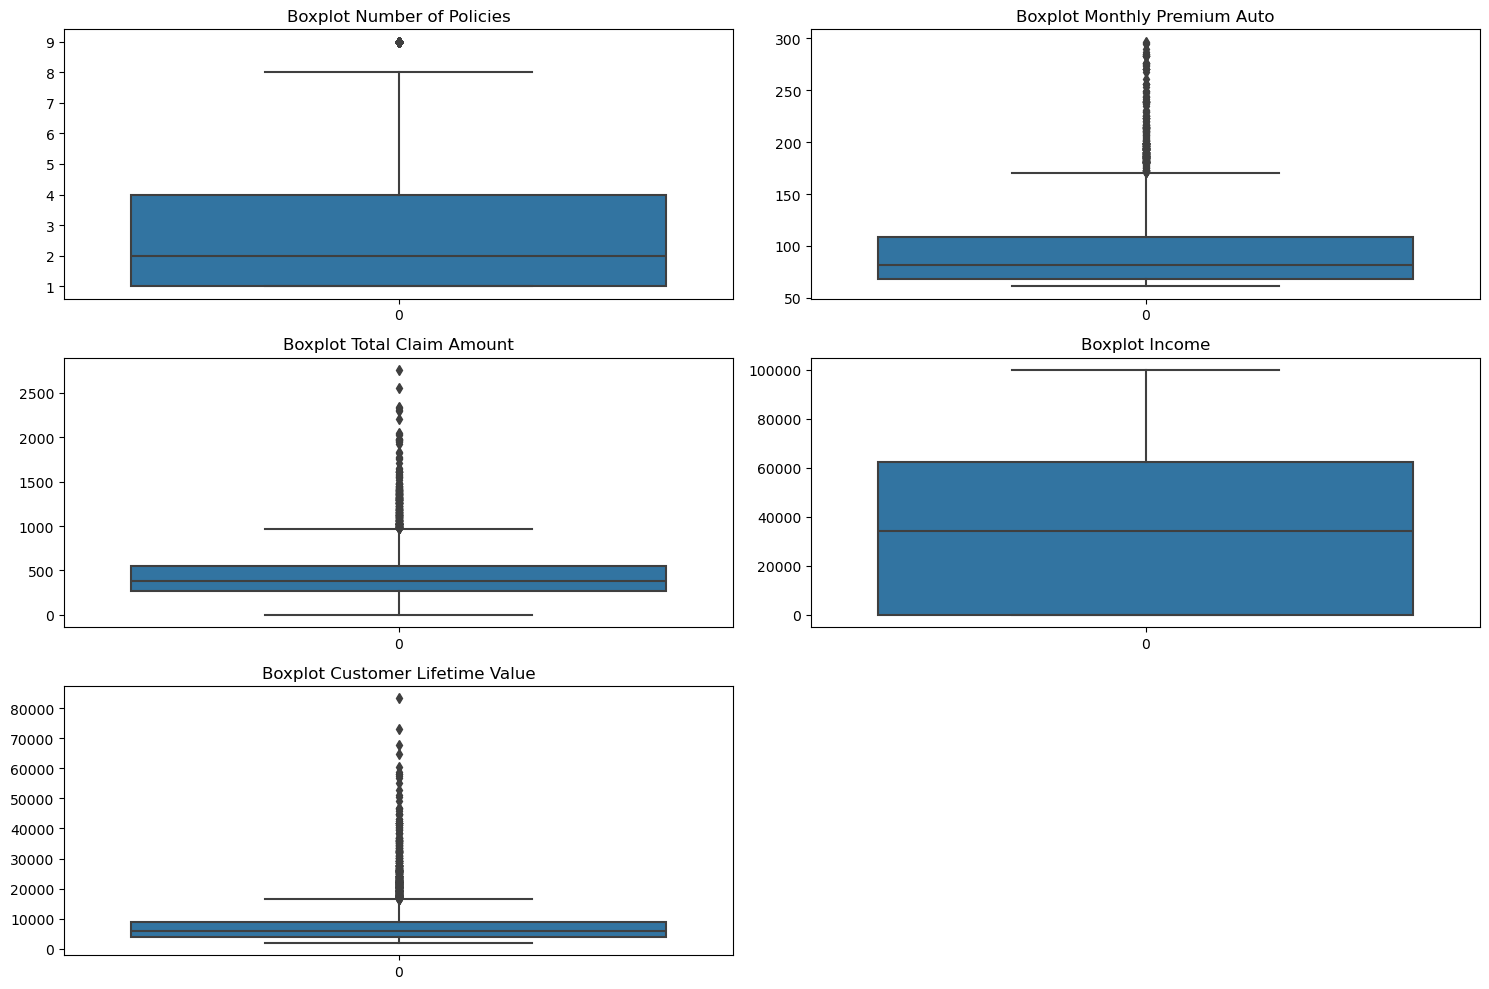

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menampilkan histogram untuk setiap fitur numerik
numerical_features = ['Number of Policies', 'Monthly Premium Auto', 'Total Claim Amount', 'Income', 'Customer Lifetime Value']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 2, i+1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribusi {feature}')

plt.tight_layout()
plt.show()

# Menampilkan boxplot untuk setiap fitur numerik
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 2, i+1)
    sns.boxplot(df[feature])
    plt.title(f'Boxplot {feature}')

plt.tight_layout()
plt.show()


Penjelasan :
1. Distribusi Number of Policies : Sebagian besar pelanggan cenderung memiliki sedikit kebijakan asuransi, dengan distribusi yang menurun significant setelah 2 kebijakan.
2. Distribusi Monthly Premium Auto : Kebanyakan pelanggan memilih premi bulanan yang lebih rendah, dan premi yang lebih tinggi kurang populer.
3. Distribusi Total Claim Amount : Klaim dalam jumlah kecil lebih umum diajukan oleh pelanggan, sedangkan klaim besar jarang terjadi.
4. Distribusi Income : Sebagian besar pelanggan memiliki pendapatan yang relatif rendah hingga menengah, sementara hanya sebagian kecil yang berpenghasilan tinggi.
5. Distribusi Customer Lifetime Value : Kebanyakan pelanggan memberikan nilai seumur hidup yang rendah hingga menengah kepada perusahaan, dengan hanya beberapa yang memiliki CLV yang sangat tinggi.

**Visualisasi Distribusi Categorical Variable**

Kita ingin melihat frekuensi dari setiap kategori dalam variabel kategorikal seperti Vehicle Class, Coverage, Employment Status, Marital Status, Education, dan Renew Offer Type. Ini membantu dalam memahami distribusi dan dominasi kategori tertentu.

Nama kolom dalam DataFrame:
Index(['Vehicle Class', 'Renew Offer Type', 'Marital Status',
       'Number of Policies', 'Monthly Premium Auto', 'Total Claim Amount',
       'Income', 'Customer Lifetime Value'],
      dtype='object')
Kolom 'Coverage' tidak ditemukan dalam DataFrame dan tidak akan diubah tipe datanya.
Kolom 'EmploymentStatus' tidak ditemukan dalam DataFrame dan tidak akan diubah tipe datanya.
Kolom 'Education' tidak ditemukan dalam DataFrame dan tidak akan diubah tipe datanya.
Tipe data setelah diubah:
Vehicle Class              category
Renew Offer Type           category
Marital Status             category
Number of Policies          float64
Monthly Premium Auto        float64
Total Claim Amount          float64
Income                      float64
Customer Lifetime Value     float64
dtype: object
Kolom 'Coverage' tidak ditemukan dalam DataFrame dan tidak akan divisualisasikan.
Kolom 'EmploymentStatus' tidak ditemukan dalam DataFrame dan tidak akan divisualisasikan.
Kolo

c:\Users\HOME\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\HOME\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\HOME\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gr

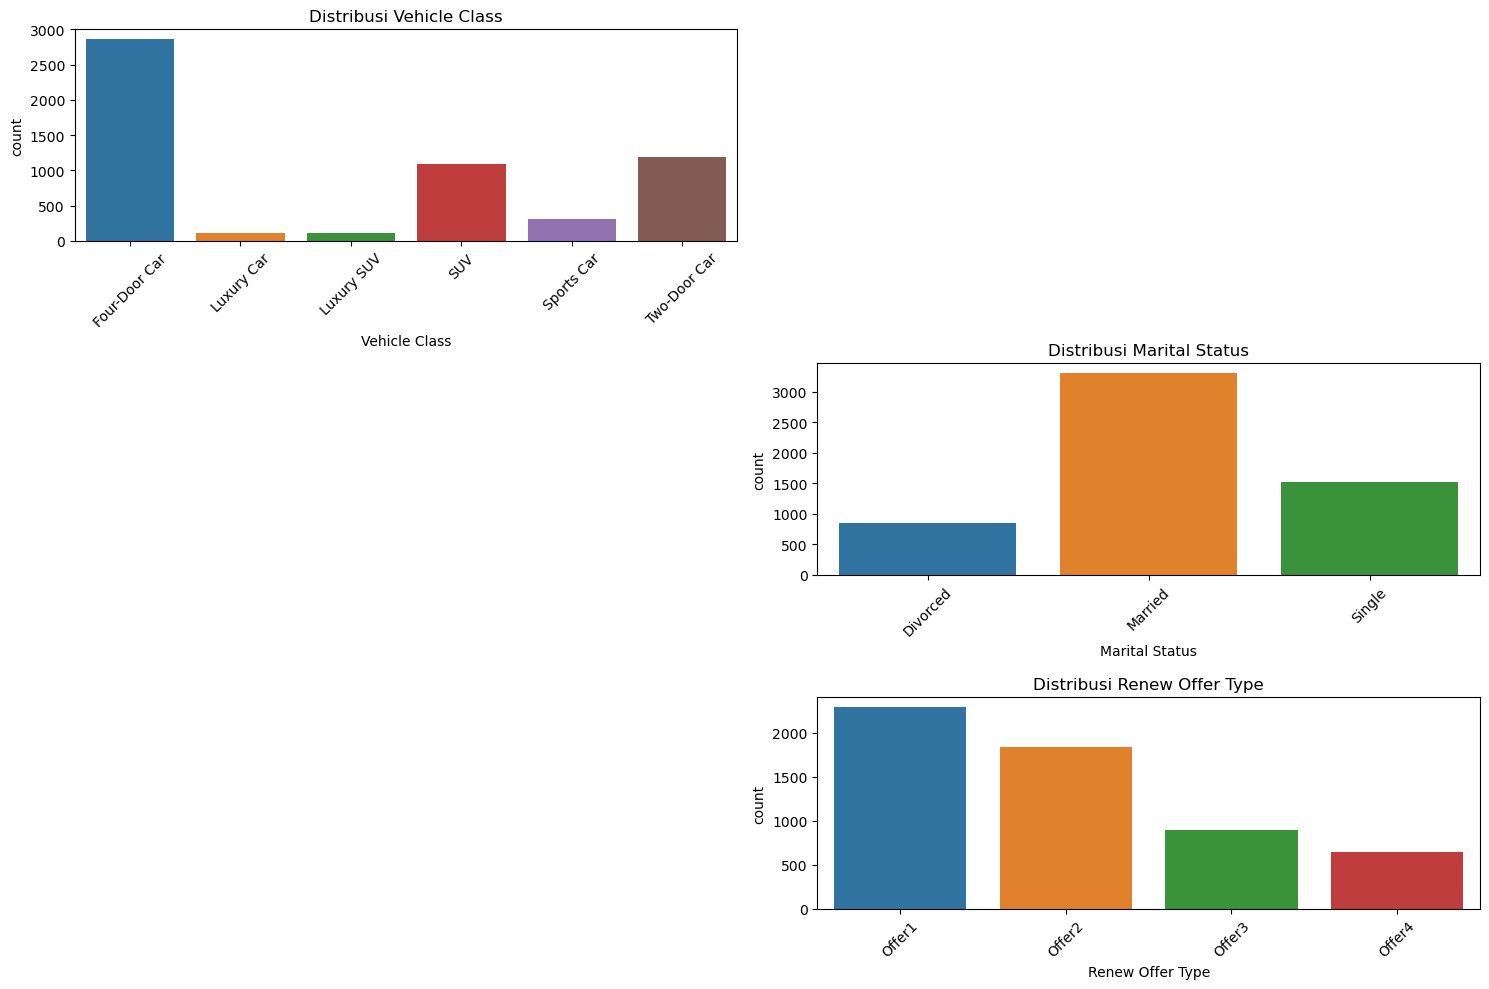

In [62]:
# Memeriksa nama kolom dalam DataFrame
print("Nama kolom dalam DataFrame:")
print(df.columns)

# Memastikan nama kolom sesuai dengan yang ada dalam DataFrame
categorical_features = ['Vehicle Class', 'Coverage', 'EmploymentStatus', 'Marital Status', 'Education', 'Renew Offer Type']

# Mengubah tipe data kolom kategorikal menjadi category
for col in categorical_features:
    if col in df.columns:
        df[col] = df[col].astype('category')
    else:
        print(f"Kolom '{col}' tidak ditemukan dalam DataFrame dan tidak akan diubah tipe datanya.")

# Memeriksa kembali tipe data dari setiap kolom
print("Tipe data setelah diubah:")
print(df.dtypes)

# Menampilkan countplot untuk setiap fitur kategorikal
plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_features):
    if feature in df.columns:
        plt.subplot(3, 2, i+1)
        sns.countplot(data=df, x=feature)
        plt.title(f'Distribusi {feature}')
        plt.xticks(rotation=45)
    else:
        print(f"Kolom '{feature}' tidak ditemukan dalam DataFrame dan tidak akan divisualisasikan.")

plt.tight_layout()
plt.show()


Penjelasan :
1. Distribusi Vehicle Class : 
- Perusahaan dapat mempertimbangkan untuk memberikan penawaran khusus atau paket asuransi yang menarik bagi pemilik "Four-Door Car" karena mereka adalah kelompok terbesar.
- Untuk menarik segmen pasar yang memiliki kendaraan mewah atau olahraga, strategi pemasaran yang berbeda mungkin diperlukan.
2. Distribusi Marital Status : 
- Penawaran asuransi yang mencakup keluarga atau pasangan mungkin lebih menarik bagi kelompok terbesar, yaitu yang menikah.
- Penelitian lebih lanjut mungkin diperlukan untuk memahami kebutuhan khusus dari kelompok yang bercerai atau belum menikah.
3. Distribusi Renew Offer Type
- Jenis penawaran yang paling populer dapat diidentifikasi sebagai strategi yang efektif.
- Penawaran yang kurang populer mungkin perlu dievaluasi atau disesuaikan untuk meningkatkan penerimaannya.

**Analisa Multivariat**

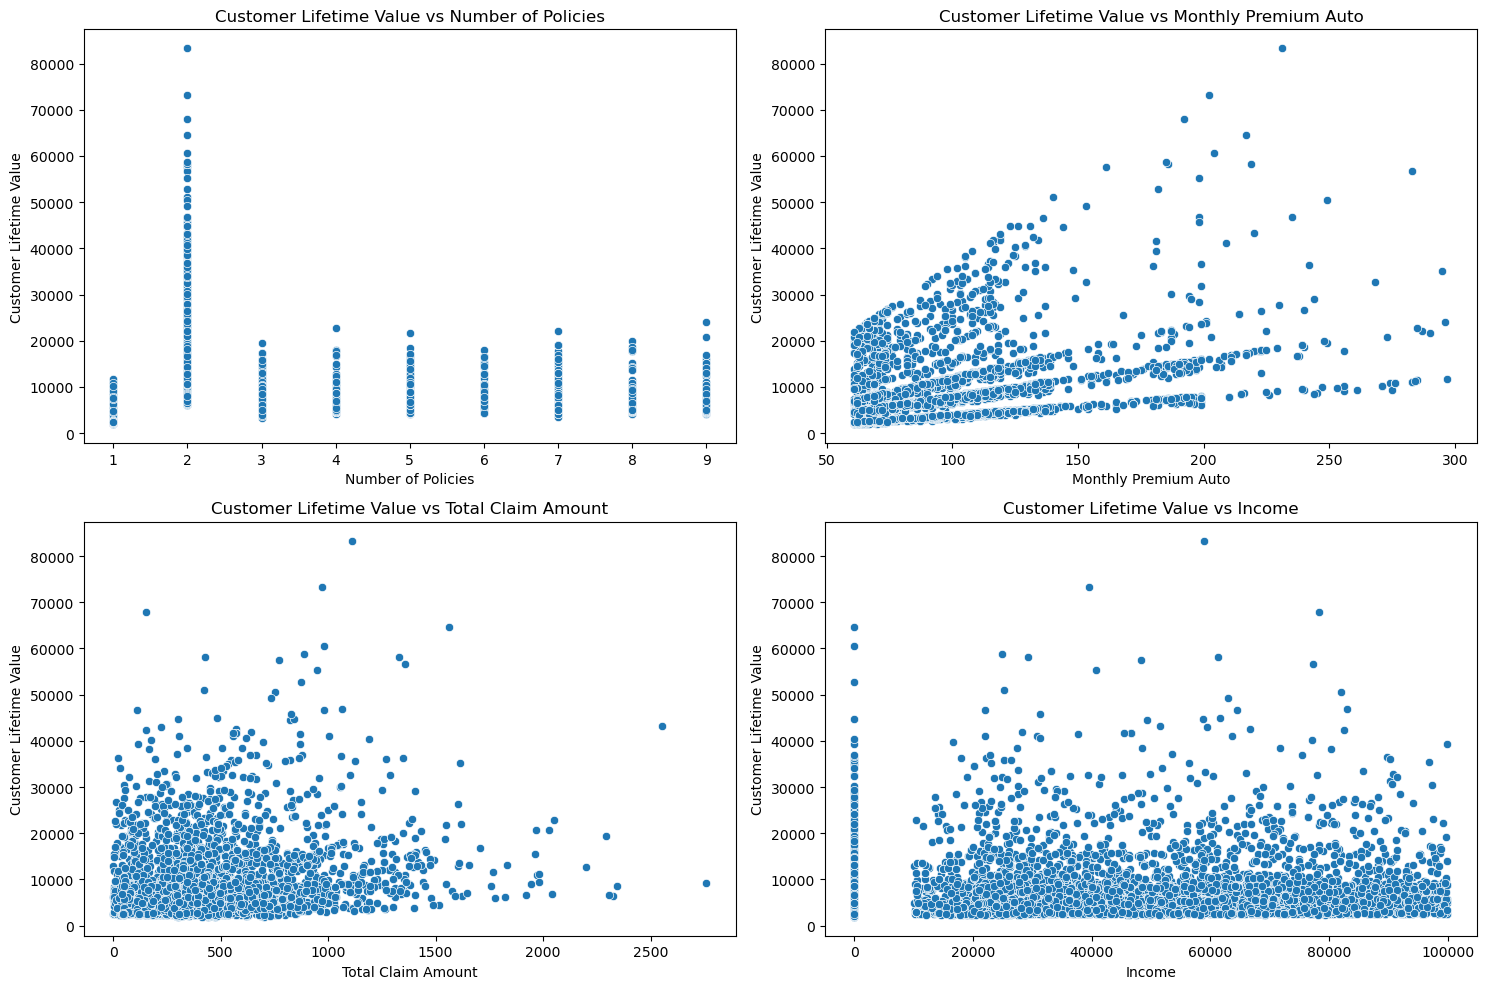

c:\Users\HOME\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\HOME\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\HOME\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gr

Kolom 'Coverage' tidak ditemukan dalam DataFrame dan tidak akan divisualisasikan.
Kolom 'EmploymentStatus' tidak ditemukan dalam DataFrame dan tidak akan divisualisasikan.
Kolom 'Education' tidak ditemukan dalam DataFrame dan tidak akan divisualisasikan.


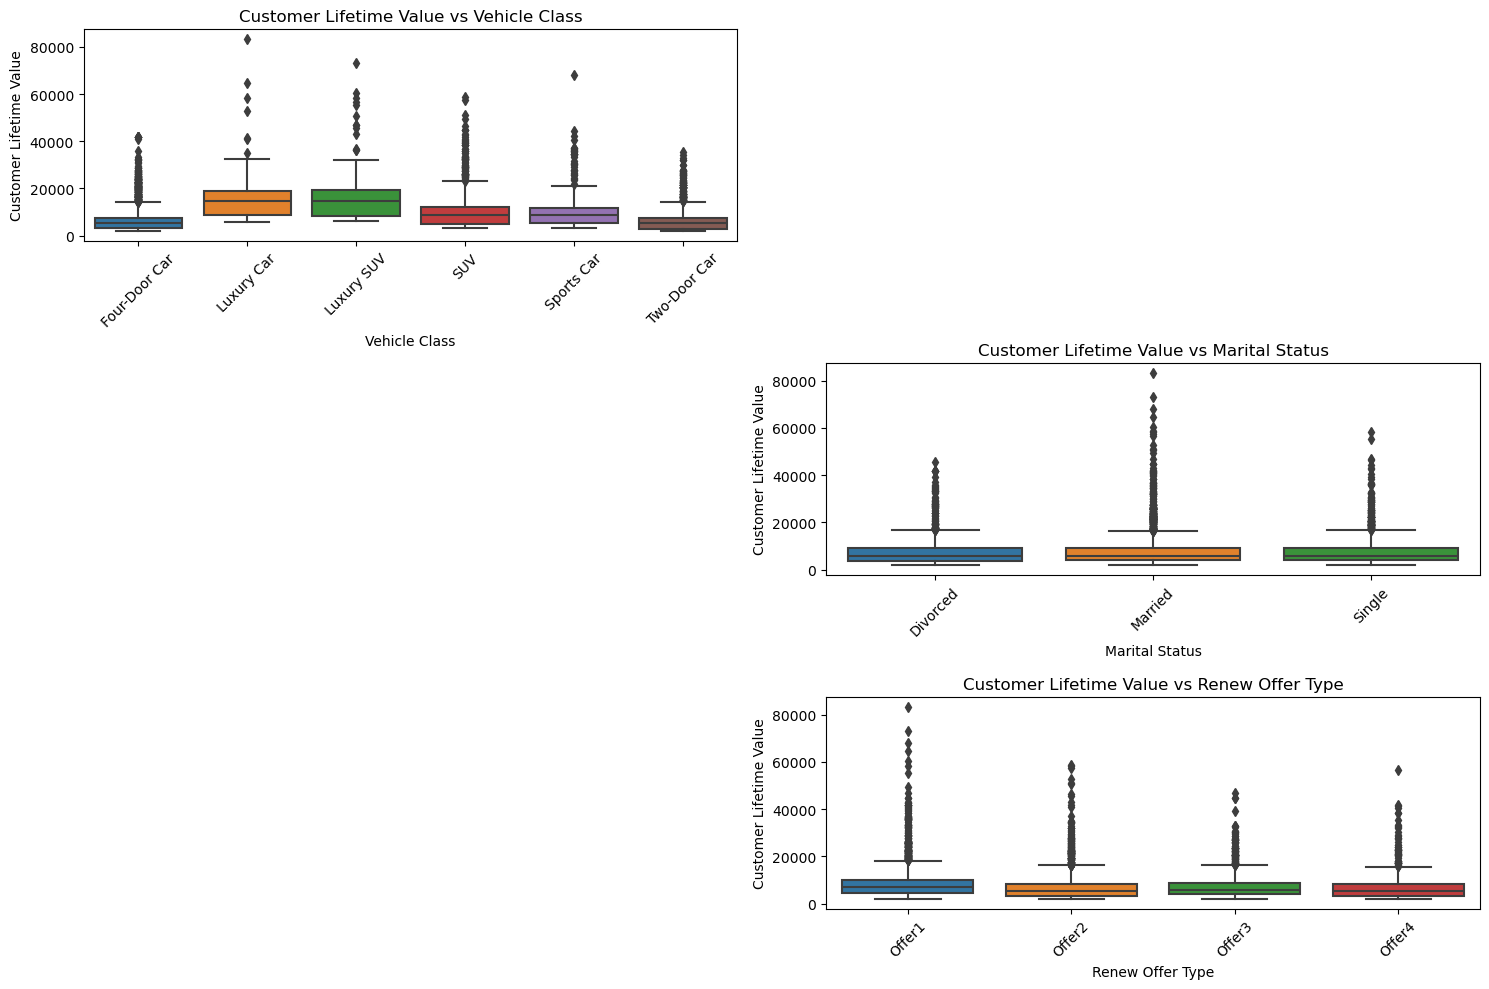

In [66]:
# Scatter plot Customer Lifetime Value vs variabel numerik lainnya
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features[:-1]):  # Exclude 'Customer Lifetime Value' itself
    plt.subplot(2, 2, i+1)
    sns.scatterplot(data=df, x=feature, y='Customer Lifetime Value')
    plt.title(f'Customer Lifetime Value vs {feature}')

plt.tight_layout()
plt.show()

# Box plot Customer Lifetime Value vs variabel kategorikal
categorical_features = ['Vehicle Class', 'Coverage', 'EmploymentStatus', 'Marital Status', 'Education', 'Renew Offer Type']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_features):
    if feature in df.columns:
        plt.subplot(3, 2, i+1)
        sns.boxplot(data=df, x=feature, y='Customer Lifetime Value')
        plt.title(f'Customer Lifetime Value vs {feature}')
        plt.xticks(rotation=45)
    else:
        print(f"Kolom '{feature}' tidak ditemukan dalam DataFrame dan tidak akan divisualisasikan.")

plt.tight_layout()


Scatter Plot:
- Customer Lifetime Value vs Income: Apakah ada korelasi antara pendapatan pelanggan dan nilai seumur hidup mereka. Biasanya, kita mengharapkan bahwa pelanggan dengan pendapatan lebih tinggi memiliki CLV lebih tinggi.
- Customer Lifetime Value vs Total Claim Amount: Melihat apakah ada hubungan antara jumlah klaim total yang diajukan oleh pelanggan dengan CLV mereka. Ini bisa menunjukkan apakah pelanggan yang sering klaim memiliki CLV lebih rendah atau lebih tinggi.
- Customer Lifetime Value vs Monthly Premium Auto: Menunjukkan apakah premi bulanan yang lebih tinggi berhubungan dengan CLV yang lebih tinggi.

Box Plot:
- Customer Lifetime Value vs Vehicle Class: Bagaimana CLV bervariasi berdasarkan jenis kendaraan yang diasuransikan. Misalnya, apakah pelanggan dengan kendaraan kelas premium memiliki CLV lebih tinggi.
- Customer Lifetime Value vs Marital Status: Melihat bagaimana status perkawinan mempengaruhi CLV.
- Customer Lifetime Value vs Renew Offer Type: Melihat apakah jenis penawaran perpanjangan mempengaruhi CLV pelanggan.

## **Data Cleaning**

In [13]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Vehicle Class,object,0,0.0,6,"[Four-Door Car, SUV]"
1,Coverage,object,0,0.0,3,"[Premium, Extended]"
2,Renew Offer Type,object,0,0.0,4,"[Offer2, Offer4]"
3,EmploymentStatus,object,0,0.0,5,"[Disabled, Employed]"
4,Marital Status,object,0,0.0,3,"[Single, Divorced]"
5,Education,object,0,0.0,5,"[Doctor, Bachelor]"
6,Number of Policies,float64,0,0.0,9,"[4.0, 1.0]"
7,Monthly Premium Auto,float64,0,0.0,191,"[198.0, 239.0]"
8,Total Claim Amount,float64,0,0.0,3274,"[159.631303, 240.186527]"
9,Income,float64,0,0.0,3625,"[62773.0, 68798.0]"


Pertama kita akan menghapus kolom Coverage. Kolom Coverage meggambarkan jenis cakupan asuransi yang dipilih oleh pelanggan (misalnya, dasar, lanjutan, premium). Kolom ini di hapus karena 
1. Tidak signifikan secara statistik : jika setelah analisis awal, tidak ditemukan korelasi signifikan antara jenis cakupan dan CLV, maka fitur ini mungkin tidak memberikan kontribusi yang berarti untuk model prediktif.
2. Redundansi Potensial: Informasi yang terkandung dalam cakupan mungkin sudah tercermin dalam fitur lain seperti premi bulanan atau jumlah klaim total, sehingga menambah redundansi.

In [14]:
df.drop(['Coverage'],axis=1, inplace=True)

Mari kita check informasi dataframenya lagi

In [15]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Vehicle Class,object,0,0.0,6,"[Sports Car, SUV]"
1,Renew Offer Type,object,0,0.0,4,"[Offer3, Offer4]"
2,EmploymentStatus,object,0,0.0,5,"[Unemployed, Employed]"
3,Marital Status,object,0,0.0,3,"[Divorced, Single]"
4,Education,object,0,0.0,5,"[Master, College]"
5,Number of Policies,float64,0,0.0,9,"[2.0, 1.0]"
6,Monthly Premium Auto,float64,0,0.0,191,"[201.0, 121.0]"
7,Total Claim Amount,float64,0,0.0,3274,"[412.106287, 238.057939]"
8,Income,float64,0,0.0,3625,"[61233.0, 35205.0]"
9,Customer Lifetime Value,float64,0,0.0,5049,"[4717.625727, 6347.497519]"


Terlihat bahwa column Coverage sudah tidak ada.

Berikutnya, kita akan menghapus kolom employment status dan education. Mengapa fitur tersebut di hapus?

Untuk employemt, terdapat korelasi yang rendah. Jika tidak ada korelasi yang signifikan antara status pekerjaan dan CLV, informasi ini mungkin tidak membantu dalam prediksi. Selain itu, variabilitas juga rendah. Variabilitas dalam status pekerjaan mungkin tidak cukup signifikan untuk mempengaruhi nilai CLV, terutama jika pendapatan pelanggan (income) sudah digunakan sebagai fitur yang lebih langsung terkait dengan kemampuan finansial mereka.

Sedangkan untuk education, terlihat bahwa ada keterkaitan tidak langsung. Meskipun pendidikan dapat mempengaruhi pendapatan dan status sosial, dampak langsungnya terhadap CLV mungkin tidak terlalu signifikan. Selanjutnya, terdapat informasi redundan. Informasi mengenai pendidikan bisa dianggap redundan jika pendapatan sudah dijadikan fitur, karena pendidikan cenderung berkontribusi pada pendapatan dan secara tidak langsung pada CLV.

In [17]:
df.drop(['EmploymentStatus', 'Education'],axis=1, inplace=True)

Mari kita check informasi dataframenya lagi

In [18]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Vehicle Class,object,0,0.0,6,"[Luxury Car, Luxury SUV]"
1,Renew Offer Type,object,0,0.0,4,"[Offer1, Offer3]"
2,Marital Status,object,0,0.0,3,"[Divorced, Single]"
3,Number of Policies,float64,0,0.0,9,"[6.0, 7.0]"
4,Monthly Premium Auto,float64,0,0.0,191,"[169.0, 156.0]"
5,Total Claim Amount,float64,0,0.0,3274,"[309.161777, 753.760098]"
6,Income,float64,0,0.0,3625,"[20588.0, 64640.0]"
7,Customer Lifetime Value,float64,0,0.0,5049,"[21766.83059, 5363.076547]"


Sekarang column Employment Status dan Education sudah tidak ada.

## **Missing Value**

In [32]:
# Cek nilai missing value
df.isnull().sum()

Vehicle Class              0
Coverage                   0
Renew Offer Type           0
EmploymentStatus           0
Marital Status             0
Education                  0
Number of Policies         0
Monthly Premium Auto       0
Total Claim Amount         0
Income                     0
Customer Lifetime Value    0
dtype: int64

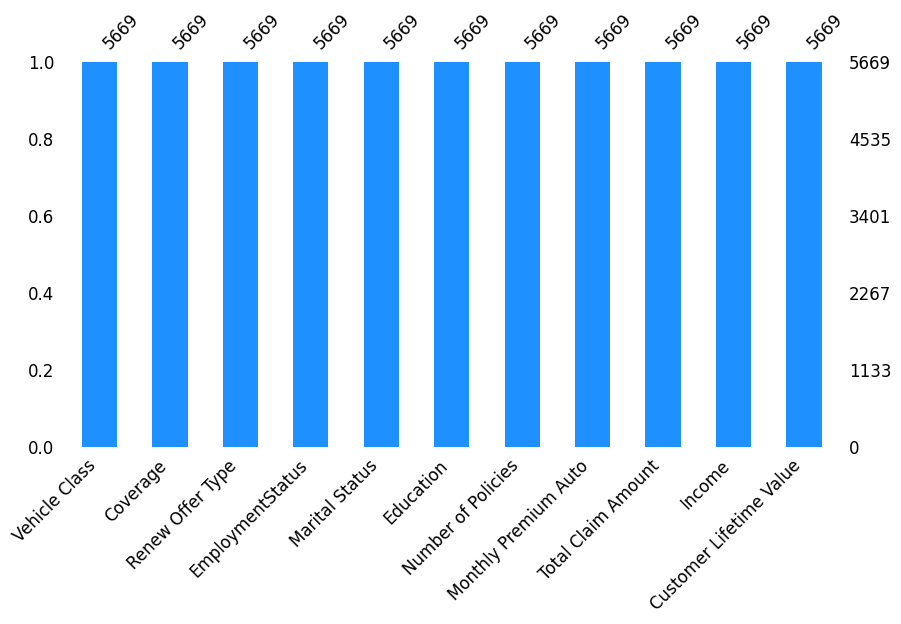

In [28]:
msno.bar(df,color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12);

Terlihat bahwa pada data ini Customer Lifetime Value ini, datanya penuh atau tidak memiliki nilai missing value.

In [35]:
# Cek deskriptif statistik fitur numerikal
num_features = [feature for feature in df.columns if df[feature].dtype != 'object']
df[num_features].describe()

,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
count,5669.000000,5669.000000,5669.000000,5669.000000,5669.000000
mean,2.979361,93.026989,431.407103,37868.188569,8029.874592
std,2.393187,34.551795,287.558038,30490.490723,6916.708246
min,1.000000,61.000000,0.423310,0.000000,1898.007675
25%,1.000000,68.000000,266.932542,0.000000,3954.344534
50%,2.000000,82.000000,379.200000,34322.000000,5800.188903
75%,4.000000,109.000000,549.986128,62464.000000,9031.214859
max,9.000000,297.000000,2759.794354,99934.000000,83325.381190


Dari data diatas, terlhat ada data yang bernilai 0 yaitu Income, dan Total Claim Account. Income tidak mungkin 0 dikarenakan itu merupakan pendapatan seseorang yang tidak mungkin bernilai 0. Oleh karena itu, data yang memiliki nilai income = 0 lebih baik kita drop. Selain itu, agar bisa membangun model prediktif yang lebih baik, kita filter kembali datanya dengan hanya memilih Total Claim Amount yang minimal memiliki 2 point. Jadi, total claim amount yang belum memiliki review dan hanya memiliki 1 point tidak akan digunakan untuk proses pemodelan.

In [40]:
# Cek nilai Income yang bernilai 0
df[df['Income'] == 0]['Income'].count()

1429

In [43]:
# Cek listing yang memiliki Total Claim Amount kurang dari 100
df[df['Total Claim Amount'] < 100]['Total Claim Amount'].count()

556

In [46]:
# Drop data dengan nilai Income = 0 & Total Claim Amount < 100
df = df[(df['Income'] != 0) & (df['Total Claim Amount'] < 100)]

In [48]:
# Cek kembali dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 520 entries, 5 to 5666
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            520 non-null    object 
 1   Coverage                 520 non-null    object 
 2   Renew Offer Type         520 non-null    object 
 3   EmploymentStatus         520 non-null    object 
 4   Marital Status           520 non-null    object 
 5   Education                520 non-null    object 
 6   Number of Policies       520 non-null    float64
 7   Monthly Premium Auto     520 non-null    float64
 8   Total Claim Amount       520 non-null    float64
 9   Income                   520 non-null    float64
 10  Customer Lifetime Value  520 non-null    float64
dtypes: float64(5), object(6)
memory usage: 48.8+ KB


## **Data Correlation**

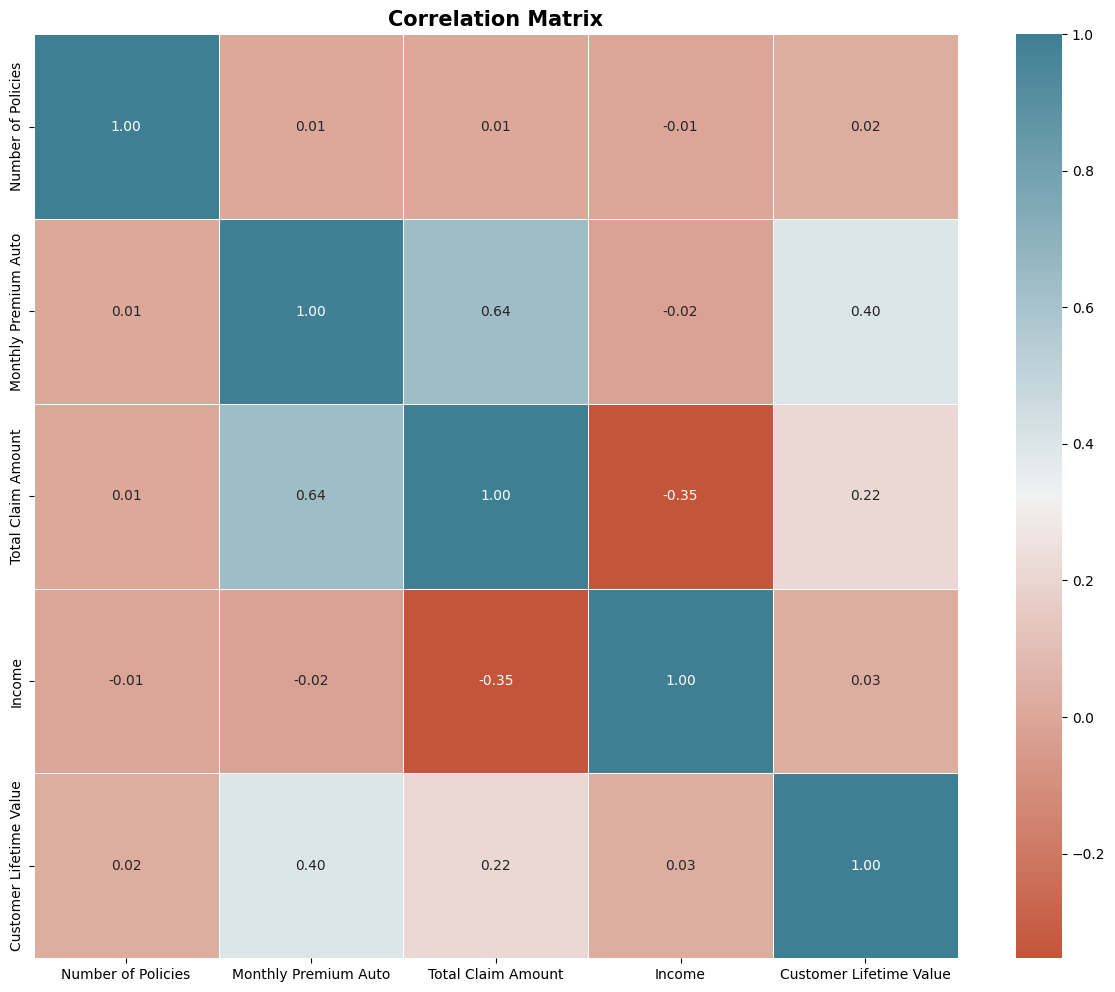

In [61]:
# Correlation matrix
numeric_df = df.select_dtypes(include=[np.number])

# Plot the correlation matrix
plt.figure(figsize=(15, 12))
palette = sns.diverging_palette(20, 220, n=256)
corr = numeric_df.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt='.2f', cmap=palette, square=True, linewidths=.5)
plt.title('Correlation Matrix', size=15, weight='bold')
plt.show()

Angka pada heatmap menunjukkan koefisien korelasi antara dua variabel.

- Korelasi +1: Hubungan linier positif sempurna.
- Korelasi -1: Hubungan linier negatif sempurna.
- Korelasi 0: Tidak ada hubungan linier.

Hasil : 
- *Monthly Premium Auto dengan Total Claim Amount (0.64):*
Korelasi positif kuat. Ini menunjukkan bahwa jika Monthly Premium Auto meningkat, Total Claim Amount juga cenderung meningkat.

- *Total Claim Amount dengan Income (-0.35):*
Korelasi negatif sedang. Ini menunjukkan bahwa jika Total Claim Amount meningkat, Income cenderung menurun.

- *Monthly Premium Auto dengan Customer Lifetime Value (0.40):*
Korelasi positif sedang. Ini menunjukkan bahwa jika Monthly Premium Auto meningkat, Customer Lifetime Value juga cenderung meningkat.

Selanjutnya, kita akan mengecek distribusi data dan outliers untuk tiap numerikal fitur. Jika distribusinya memiliki skewness yang tinggi, salah satu cara yang dapat kita lakukan untuk menguranginya adalah dengan melakukan rekayasa pada tiap fiturnya.

## **Outliers Distribution**

Banyaknya outliers pada data tentu akan memengaruhi hasil analisis dan pemodelan yang dilakukan. Ada beberapa hal yang harus dipertimbangkan sebelum memutuskan treatment yang sesuai dengan data, di antaranya adalah dengan mempertimbangkan sisi domain knowledge.

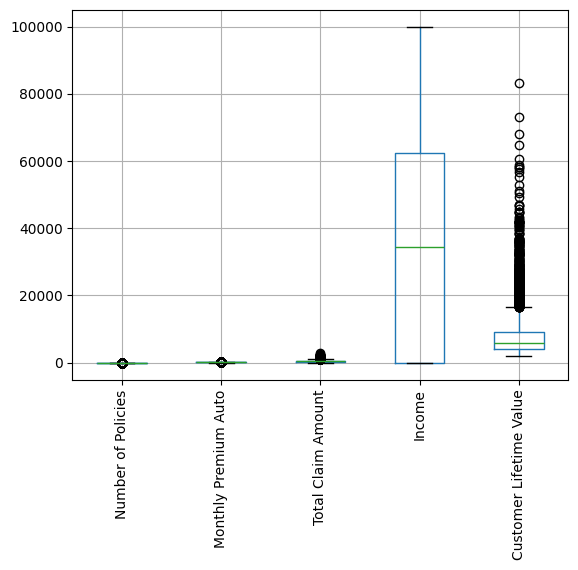

In [62]:
# Plot boxplot untuk mengecek outliers
df.boxplot(rot=90);

1. Number of Policies
- Outliers : Ada beberapa outlier yang menunjukkan bahwa beberapa pelanggan memiliki jumlah polis yang jauh lebih tinggi dibandingkan pelanggan lainnya.


2. Monthly Premium Auto
- Outliers: Ada beberapa outlier yang menunjukkan bahwa beberapa pelanggan membayar premi bulanan yang jauh lebih tinggi.


3. Total Claim Amount
- Outliers: Ada beberapa outlier yang menunjukkan bahwa beberapa pelanggan mengajukan klaim dengan jumlah yang jauh lebih tinggi.


4. Income
- Outliers: Ada beberapa outlier yang menunjukkan pendapatan yang sangat tinggi.


5. Customer Lifetime Value
- Outliers: Ada banyak outlier di bagian atas, menunjukkan bahwa beberapa pelanggan memiliki nilai CLV yang jauh lebih tinggi.

Dikarenakan adanya beberapa outliers, dalam project ini, untuk membuat dataset yang lebih bersih dari outliers, saya akan melakukan beberapa rekayasa data pada fitur-fitur dengan mempertimbangkan kombinasi antara hasil dari metode IQR dan juga domain knowledge. Nantinya, model yang dihasilkan hanya terbatas dapat memprediksi listing baru yang nilai-nilainya pada rentang data berdasarkan 'clean dataset' ini saja. Di luar rentang data, hasil prediksi dari model akan menjadi bias.

In [63]:
# Membuat fungsi untuk mengecek outliers
def find_anomalies(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    limit_bawah = q1 - limit
    limit_atas = q3 + limit
    print(f'limit_bawah: {limit_bawah}')
    print(f'limit_atas: {limit_atas}')   

In [66]:
# Outliers pada Number of Policies
find_anomalies(df['Number of Policies'])

IQR: 3.0
limit_bawah: -3.5
limit_atas: 8.5


In [67]:
# Outliers pada Monthly Premium Auto
find_anomalies(df['Monthly Premium Auto'])

IQR: 41.0
limit_bawah: 6.5
limit_atas: 170.5


In [68]:
# Outliers pada Total Claim Amount
find_anomalies(df['Total Claim Amount'])

IQR: 283.053586
limit_bawah: -157.64783699999998
limit_atas: 974.566507


In [69]:
# Outliers pada Income
find_anomalies(df['Income'])

IQR: 62464.0
limit_bawah: -93696.0
limit_atas: 156160.0


In [70]:
# Outliers pada Customer Lifetime Value
find_anomalies(df['Customer Lifetime Value'])

IQR: 5076.870325
limit_bawah: -3660.9609535
limit_atas: 16646.5203465


Dibawah ini merupakan feature engineering berdasarkan fitur-fitur numerikal

**1. Number of Policies**

In [72]:
# Cek deskriptif statistik kolom Number of Policies
df['Number of Policies'].describe()

count    5669.000000
mean        2.979361
std         2.393187
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max         9.000000
Name: Number of Policies, dtype: float64

In [73]:
# Cek Number of Policies > 8.5
df[df['Number of Policies'] > 8.5].count()['Number of Policies']

264

Terlihat bahwa 75% data pada kolom Number of Policies bernilai < 4, sedangkan nilai maksimalnya adalah 9. Tentu terdapat skewness pada distribusinya, yaitu tail yang memanjang di sebelah kanan (positive skewness). Terdapat 264 data yang nilai Number of Policiesnya lebih besar dari 8.5 (batas atas berdasarkan metode IQR). Oleh karena itu, data yang memiliki Number of Policies lebih besar dari  8.5 tidak akan dimasukkan ke dalam pemodelan, sehingga skewness-nya pun akan berkurang. Hal ini tentu akan menjadi limitasi untuk model yang nantinya dibangun. 

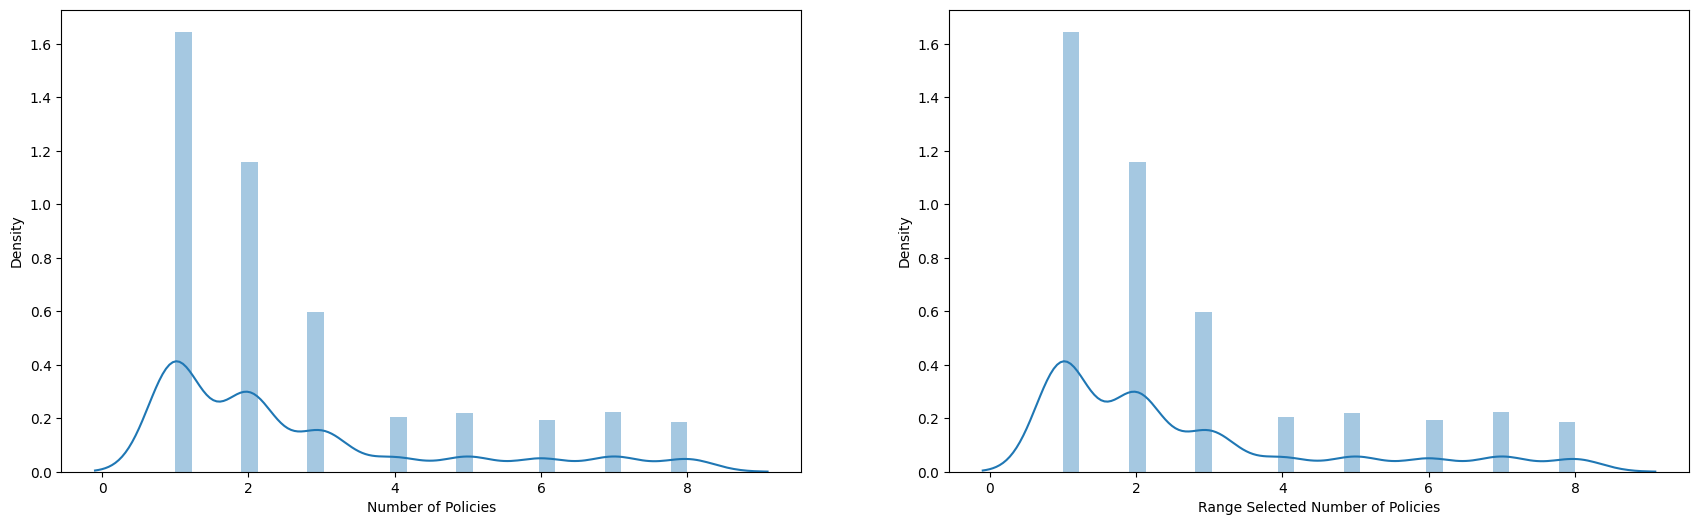

In [77]:
# Filtering pada data
df = df[(df['Number of Policies'] <= 8.5)]

# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['Number of Policies'], ax=axes[0])
sns.distplot(df['Number of Policies'], ax=axes[1])
axes[0].set_xlabel('Number of Policies')
axes[1].set_xlabel('Range Selected Number of Policies');

In [78]:
# Cek deskriptif statistik kolom 'Number of Policies' setelah filtering
df['Number of Policies'].describe()

count    5405.000000
mean        2.685291
std         2.037113
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         8.000000
Name: Number of Policies, dtype: float64

**2. Monthly Premium Auto**

In [79]:
# Cek deskriptif statistik kolom Number of Policies
df['Monthly Premium Auto'].describe()

count    5405.000000
mean       93.013691
std        34.533930
min        61.000000
25%        68.000000
50%        82.000000
75%       109.000000
max       297.000000
Name: Monthly Premium Auto, dtype: float64

In [80]:
# Cek Monthly Premium Auto > 170.5
df[df['Monthly Premium Auto'] > 170.5].count()['Monthly Premium Auto']

262

Terlihat bahwa 75% data pada kolom Monthly Premium Auto bernilai < 109, sedangkan nilai maksimalnya adalah 297. Terdapat 262 data yang nilai Monthly Premium Autonya lebih besar dari 170.5 (batas atas berdasarkan metode IQR). Oleh karena itu, data yang memiliki Monthly Premium Auto lebih besar dari 170.5 tidak akan dimasukkan ke dalam pemodelan, sehingga skewness-nya pun akan berkurang. Hal ini tentu akan menjadi limitasi untuk model yang nantinya dibangun. 

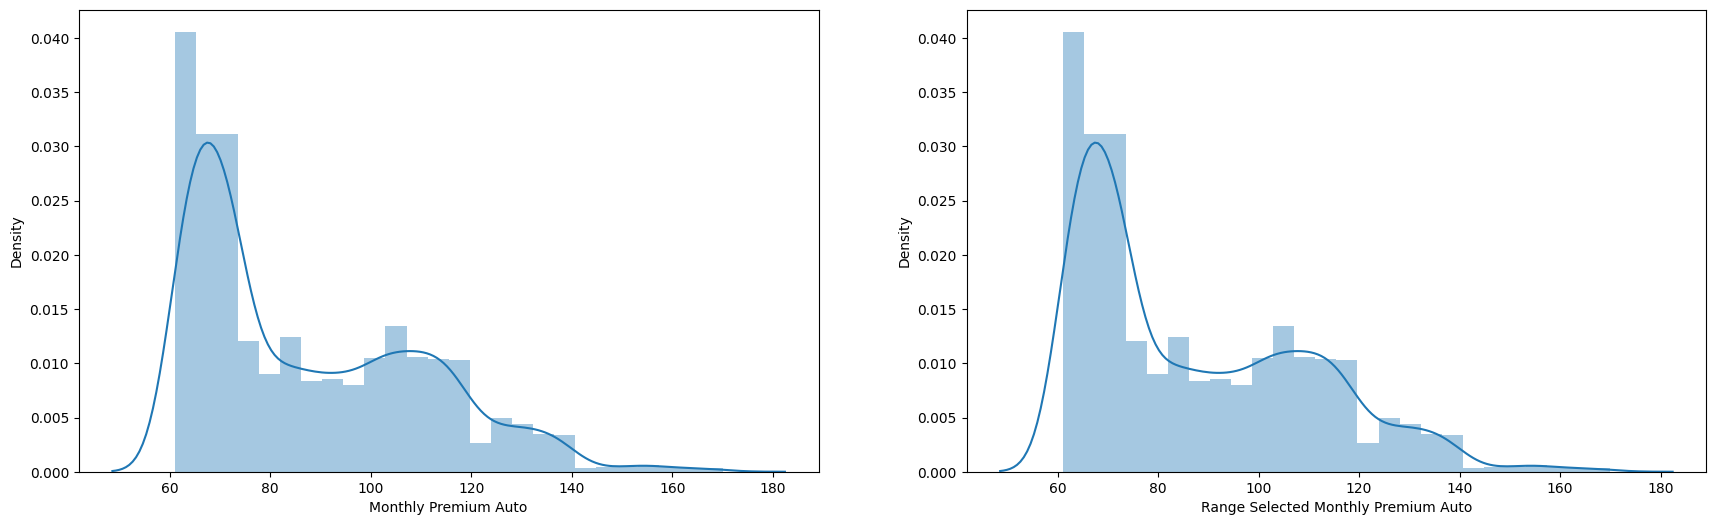

In [81]:
# Filtering pada data
df = df[(df['Monthly Premium Auto'] <= 170.5)]

# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['Monthly Premium Auto'], ax=axes[0])
sns.distplot(df['Monthly Premium Auto'], ax=axes[1])
axes[0].set_xlabel('Monthly Premium Auto')
axes[1].set_xlabel('Range Selected Monthly Premium Auto');

In [82]:
# Cek deskriptif statistik kolom 'Monthly Premium Auto' setelah filtering
df['Monthly Premium Auto'].describe()

count    5143.000000
mean       87.247326
std        22.863263
min        61.000000
25%        68.000000
50%        79.000000
75%       105.000000
max       170.000000
Name: Monthly Premium Auto, dtype: float64

**3. Total Claim Amount**

In [83]:
# Cek deskriptif statistik kolom Total Claim Amount
df['Total Claim Amount'].describe()

count    5143.000000
mean      400.611049
std       234.023271
min         0.423310
25%       256.438030
50%       366.604732
75%       528.000000
max      1516.383753
Name: Total Claim Amount, dtype: float64

In [85]:
# Cek jumlah Total Claim Amount yang memiliki lebih dari 974 listing
len(df[df['Total Claim Amount'] > 974])

117

Pada fitur 'Total Claim Amount', nilai yang lebih besar dari 974 akan di-drop. Hal ini mempertimbangkan nilai batas atas dari metode IQR dan juga domain knowledge, yang mana nilai batas atas adalah 974. Terdapat 117 data yang memiliki lebih dari 974 listing.

In [86]:
# Menerapkan limitasi data berdasar kolom 'Total Claim Amount'
df = df[(df['Total Claim Amount'] <= 974)]

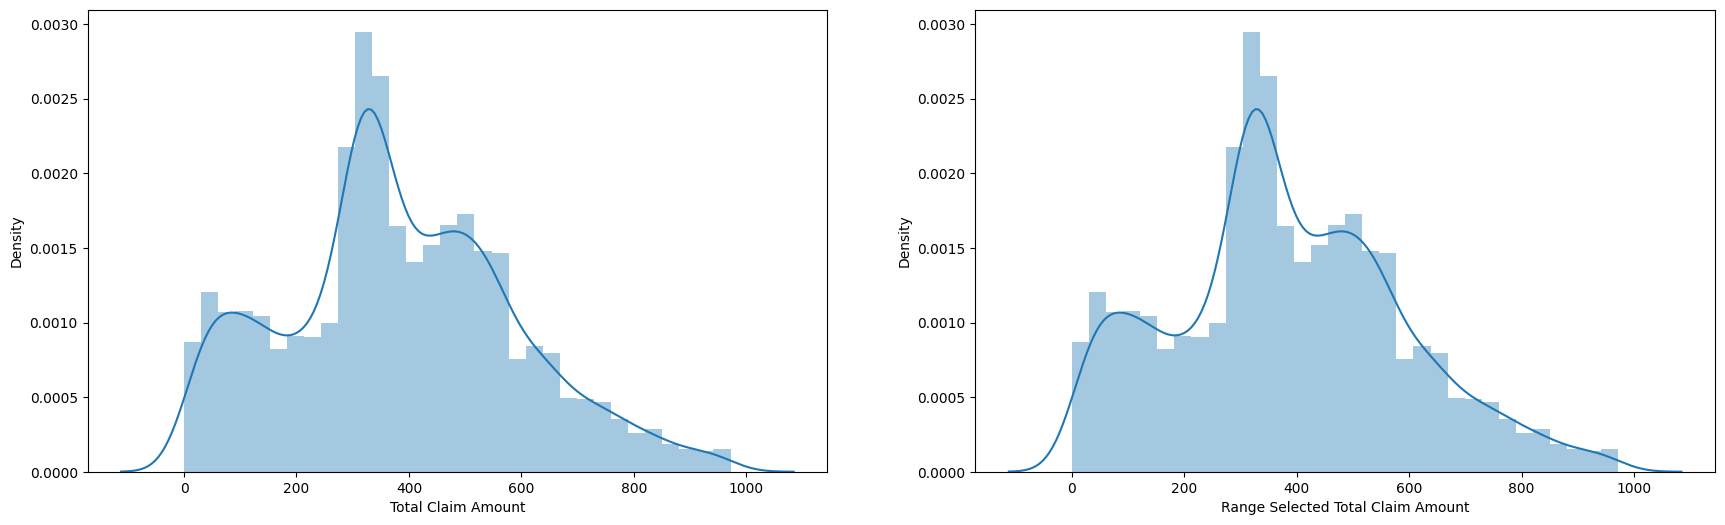

In [89]:
#Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['Total Claim Amount'], ax=axes[0])
sns.distplot(df['Total Claim Amount'], ax=axes[1])
axes[0].set_xlabel('Total Claim Amount')
axes[1].set_xlabel('Range Selected Total Claim Amount');

**4.Income**

In [103]:
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1

# Menghitung batas bawah dan batas atas outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"IQR: {IQR}")
print(f"Lower bound: {lower_bound}")
print(f"Upper bound: {upper_bound}")

IQR: 51306.75
Lower bound: -65132.125
Upper bound: 140094.875


In [104]:
# Mengidentifikasi outliers
outliers = df[(df['Income'] < lower_bound) | (df['Income'] > upper_bound)]
num_outliers = outliers.shape[0]

print(f"Number of outliers: {num_outliers}")

Number of outliers: 0


In [105]:
# Menghilangkan outliers
df_cleaned = df[(df['Income'] >= lower_bound) & (df['Income'] <= upper_bound)]

# Menampilkan deskriptif statistik Income setelah menghilangkan outliers
df_cleaned['Income'].describe()

count     5026.000000
mean     38532.148229
std      30492.981388
min          0.000000
25%      11828.000000
50%      34990.000000
75%      63134.750000
max      99934.000000
Name: Income, dtype: float64

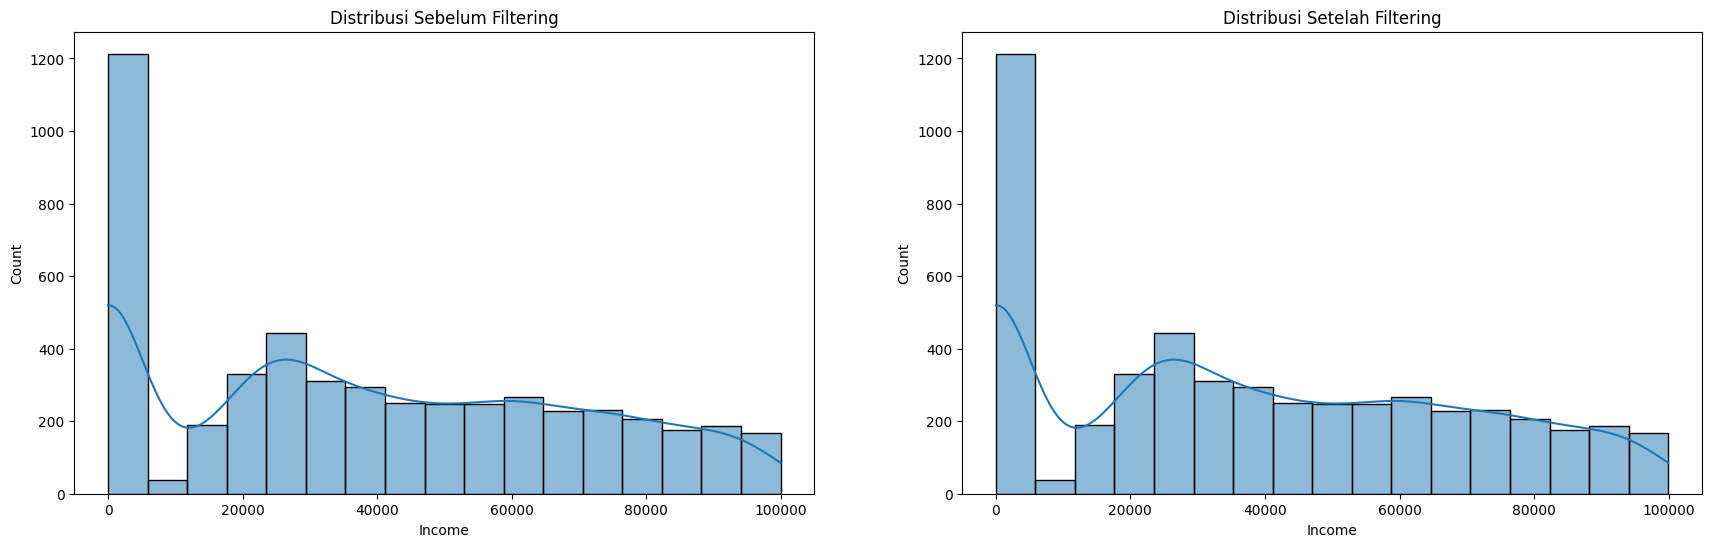

In [106]:
# Plot distribusi sebelum dan sesudah filtering
fig, axes = plt.subplots(1, 2, figsize=(21, 6))
sns.histplot(df['Income'], kde=True, ax=axes[0])
sns.histplot(df_cleaned['Income'], kde=True, ax=axes[1])
axes[0].set_xlabel('Income')
axes[0].set_title('Distribusi Sebelum Filtering')
axes[1].set_xlabel('Income')
axes[1].set_title('Distribusi Setelah Filtering')
plt.show()

**5. Customer Lifetime Value**

In [99]:
Q1 = df['Customer Lifetime Value'].quantile(0.25)
Q3 = df['Customer Lifetime Value'].quantile(0.75)
IQR = Q3 - Q1

# Menghitung batas bawah dan batas atas outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"IQR: {IQR}")
print(f"Lower bound: {lower_bound}")
print(f"Upper bound: {upper_bound}")

IQR: 4983.700935249999
Lower bound: -3800.6123291249983
Upper bound: 16134.191411874997


In [100]:
# Mengidentifikasi outliers
outliers = df[df['Customer Lifetime Value'] > upper_bound]
num_outliers = outliers.shape[0]

print(f"Number of outliers: {num_outliers}")

Number of outliers: 432


In [101]:
# Menghilangkan outliers
df_cleaned = df[df['Customer Lifetime Value'] <= upper_bound]

# Menampilkan distribusi CLV setelah menghilangkan outliers
df_cleaned['Customer Lifetime Value'].describe()

count     4594.000000
mean      6001.534849
std       3120.914376
min       1898.007675
25%       3430.977971
50%       5257.746523
75%       7957.260766
max      16109.753530
Name: Customer Lifetime Value, dtype: float64

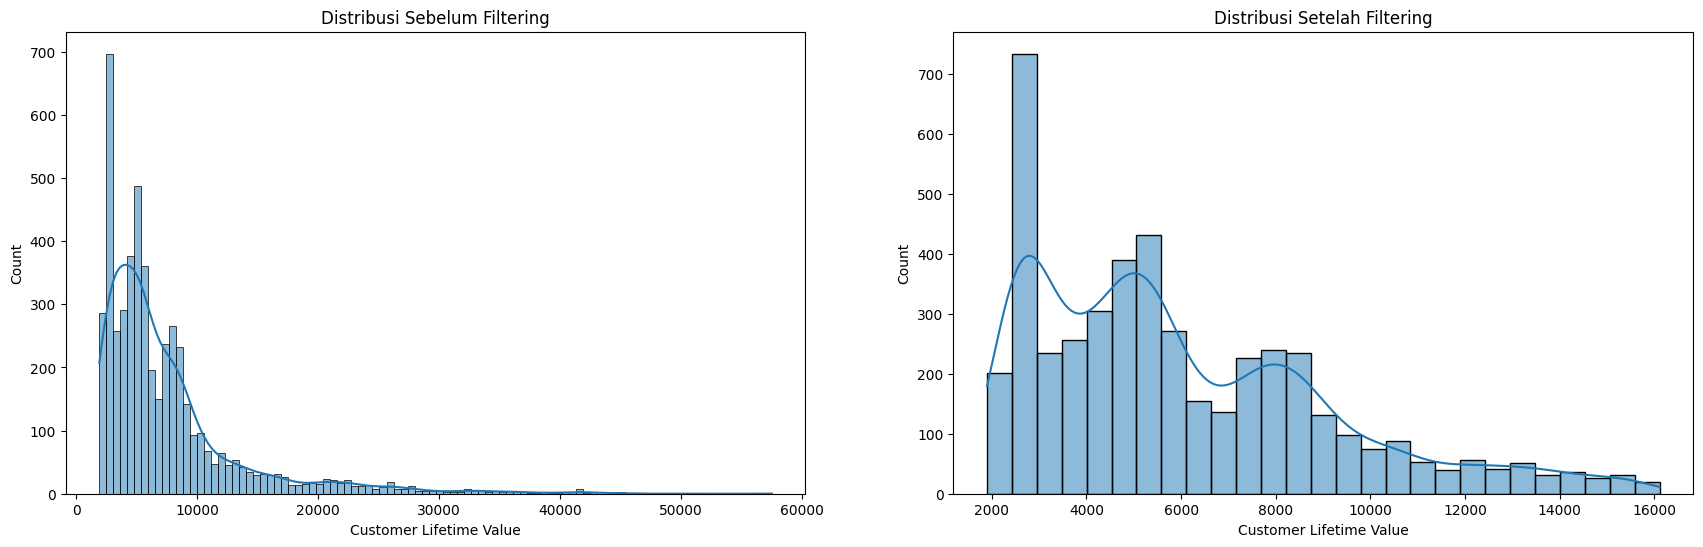

In [102]:
# Plot distribusi sebelum dan sesudah filtering
fig, axes = plt.subplots(1, 2, figsize=(21, 6))
sns.histplot(df['Customer Lifetime Value'], kde=True, ax=axes[0])
sns.histplot(df_cleaned['Customer Lifetime Value'], kde=True, ax=axes[1])
axes[0].set_xlabel('Customer Lifetime Value')
axes[0].set_title('Distribusi Sebelum Filtering')
axes[1].set_xlabel('Customer Lifetime Value')
axes[1].set_title('Distribusi Setelah Filtering')
plt.show()

Menghapus outliers dari CLV membantu dalam mengurangi variabilitas yang ekstrim. Hal ini membuat model prediktif lebih stabil dan mengurangi potensi overfitting.
Data yang tersisa lebih representatif dari populasi mayoritas, yang membantu dalam membuat prediksi yang lebih akurat untuk sebagian besar pelanggan.

In [108]:
# Cek kembali info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5026 entries, 0 to 5666
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            5026 non-null   object 
 1   Coverage                 5026 non-null   object 
 2   Renew Offer Type         5026 non-null   object 
 3   EmploymentStatus         5026 non-null   object 
 4   Marital Status           5026 non-null   object 
 5   Education                5026 non-null   object 
 6   Number of Policies       5026 non-null   float64
 7   Monthly Premium Auto     5026 non-null   float64
 8   Total Claim Amount       5026 non-null   float64
 9   Income                   5026 non-null   float64
 10  Customer Lifetime Value  5026 non-null   float64
dtypes: float64(5), object(6)
memory usage: 471.2+ KB


In [113]:
# Drop fitur 'Coverage' dan 'Employment Status' dan 'Education'
df = df.drop(columns=['Coverage', 'EmploymentStatus', 'Education'], axis=1)

In [114]:
# Cek dataset yang sudah bersih
df.head()

,Vehicle Class,Renew Offer Type,Marital Status,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Offer1,Divorced,2.0,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Offer1,Married,6.0,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Offer1,Married,2.0,62.0,257.248789,21514.0,11981.984810
3,Four-Door Car,Offer3,Married,1.0,116.0,556.800000,17913.0,4550.856045
4,Two-Door Car,Offer3,Married,1.0,62.0,355.820799,19030.0,2372.155492


In [115]:
# Cek kembali info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5026 entries, 0 to 5666
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            5026 non-null   object 
 1   Renew Offer Type         5026 non-null   object 
 2   Marital Status           5026 non-null   object 
 3   Number of Policies       5026 non-null   float64
 4   Monthly Premium Auto     5026 non-null   float64
 5   Total Claim Amount       5026 non-null   float64
 6   Income                   5026 non-null   float64
 7   Customer Lifetime Value  5026 non-null   float64
dtypes: float64(5), object(3)
memory usage: 353.4+ KB



## Modeling & Evaluation


In [84]:
# Import library untuk modeling

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

import category_encoders as ce
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, make_scorer

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [21]:
df = pd.read_csv('data_customer_lifetime_value.csv')

# Print the columns to verify
print("Columns in the dataset:", df.columns)

# Drop irrelevant or less relevant columns (use columns that exist in your DataFrame)
columns_to_drop = ['Coverage', 'EmploymentStatus', 'Education', 'Customer ID']  
columns_to_drop_existing = [col for col in columns_to_drop if col in df.columns]  # Filter only columns that exist
print("Columns to drop:", columns_to_drop_existing)
df = df.drop(columns=columns_to_drop_existing)

# Check and convert types if necessary
df['Vehicle Class'] = df['Vehicle Class'].astype('category')
df['Renew Offer Type'] = df['Renew Offer Type'].astype('category')
df['Marital Status'] = df['Marital Status'].astype('category')

# Define categorical and numerical features
categorical_features = ['Vehicle Class', 'Renew Offer Type', 'Marital Status']
numerical_features = ['Number of Policies', 'Monthly Premium Auto', 'Total Claim Amount', 'Income']

# Define the ColumnTransformer
transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features),
        ('num', StandardScaler(), numerical_features)
    ],
    remainder='passthrough'
)

Columns in the dataset: Index(['Vehicle Class', 'Coverage', 'Renew Offer Type', 'EmploymentStatus',
       'Marital Status', 'Education', 'Number of Policies',
       'Monthly Premium Auto', 'Total Claim Amount', 'Income',
       'Customer Lifetime Value'],
      dtype='object')
Columns to drop: ['Coverage', 'EmploymentStatus', 'Education']


In [22]:
# Split the data into features and target
X = df.drop('Customer Lifetime Value', axis=1)
y = df['Customer Lifetime Value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models and parameter grids
rf = RandomForestRegressor(random_state=1)
param_grid_rf = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [10, 20, 30],
    'model__min_samples_split': [2, 5, 10]
}

xgb = XGBRegressor(random_state=1)
param_grid_xgb = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [3, 6, 9],
    'model__learning_rate': [0.01, 0.1, 0.2]
}

# Create the pipelines
pipeline_rf = Pipeline(steps=[
    ('preprocessing', transformer),
    ('model', rf)
])

pipeline_xgb = Pipeline(steps=[
    ('preprocessing', transformer),
    ('model', xgb)
])

# RandomizedSearchCV for hyperparameter tuning
random_search_rf = RandomizedSearchCV(estimator=pipeline_rf, param_distributions=param_grid_rf, n_iter=10, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)
random_search_xgb = RandomizedSearchCV(estimator=pipeline_xgb, param_distributions=param_grid_xgb, n_iter=10, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)

# Fit the models
random_search_rf.fit(X_train, y_train)
random_search_xgb.fit(X_train, y_train)

# Predict on the test set
best_model_rf = random_search_rf.best_estimator_
best_model_xgb = random_search_xgb.best_estimator_
y_pred_rf = best_model_rf.predict(X_test)
y_pred_xgb = best_model_xgb.predict(X_test)

# Calculate scores
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf)

rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mape_xgb = mean_absolute_percentage_error(y_test, y_pred_xgb)

# Display the results
print(f"Random Forest - Best parameters: {random_search_rf.best_params_}")
print(f"Random Forest - RMSE: {rmse_rf}")
print(f"Random Forest - MAE: {mae_rf}")
print(f"Random Forest - MAPE: {mape_rf}")

print(f"XGBoost - Best parameters: {random_search_xgb.best_params_}")
print(f"XGBoost - RMSE: {rmse_xgb}")
print(f"XGBoost - MAE: {mae_xgb}")
print(f"XGBoost - MAPE: {mape_xgb}")

# View the tuning results in a DataFrame
tuning_results_rf = pd.DataFrame(random_search_rf.cv_results_)
tuning_results_xgb = pd.DataFrame(random_search_xgb.cv_results_)
print("Columns available in cv_results_ for Random Forest:", tuning_results_rf.columns)  # Check available columns
print("Columns available in cv_results_ for XGBoost:", tuning_results_xgb.columns)  # Check available columns

# Sort the results by available ranking columns
sorted_results_rf = tuning_results_rf.sort_values(by=['rank_test_score'])
sorted_results_xgb = tuning_results_xgb.sort_values(by=['rank_test_score'])
print("Random Forest tuning results:")
print(sorted_results_rf[['param_model__n_estimators', 'param_model__max_depth', 'param_model__min_samples_split', 'mean_test_score', 'std_test_score']])
print("XGBoost tuning results:")
print(sorted_results_xgb[['param_model__n_estimators', 'param_model__max_depth', 'param_model__learning_rate', 'mean_test_score', 'std_test_score']])

Random Forest - Best parameters: {'model__n_estimators': 100, 'model__min_samples_split': 2, 'model__max_depth': 20}
Random Forest - RMSE: 4167.229605088137
Random Forest - MAE: 1635.2748806385732
Random Forest - MAPE: 0.12752038478000155
XGBoost - Best parameters: {'model__n_estimators': 100, 'model__max_depth': 3, 'model__learning_rate': 0.1}
XGBoost - RMSE: 3747.7020004350716
XGBoost - MAE: 1819.5071653021935
XGBoost - MAPE: 0.15611407516300865
Columns available in cv_results_ for Random Forest: Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_model__n_estimators', 'param_model__min_samples_split',
       'param_model__max_depth', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')
Columns available in cv_results_ for XGBoost: Index(['mean_fit_time', 'std_fit_time', 'mean_score_tim

**Choose a Benchmark Model**

In [23]:
# Define algoritma yang digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=1)
rf = RandomForestRegressor(random_state=1)
xgb = XGBRegressor(random_state=1)

# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

# Scaling data
scaler = StandardScaler()

# Kandidat algoritma
models = [log_lr, log_knn, log_dt, log_rf, log_xgb]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Mencari algoritma terbaik berdasarkan tiap metrics
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=1)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

[-7513.19083379 -6576.68540792 -6016.82835528 -6590.15048008
 -6345.10246813] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-3902.01073565 -3440.84814471 -3511.0856563  -3717.05904168
 -3453.45158828] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-0.41832885 -0.40330667 -0.42066464 -0.43373235 -0.4436701 ] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-7111.55941869 -6085.57215504 -5457.26844067 -6105.59665788
 -6230.5913956 ] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-3392.13260392 -2935.07560034 -2931.72323757 -3068.95830989
 -3150.00595205] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                    

In [29]:
# Evaluasi hasil dari 5 kandidat algoritma yang digunakan
result_df = pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

print(result_df)

                    Model    Mean_RMSE    Std_RMSE     Mean_MAE     Std_MAE  \
0       Linear Regression -6608.391509  497.848956 -3604.891033  178.608624   
1           KNN Regressor -6198.117614  530.191396 -3095.579141  169.838186   
2  DecisionTree Regressor -5364.578212  327.884307 -1771.330623  149.473431   
3  RandomForest Regressor -3844.589131  393.551448 -1431.708615  116.013818   
4       XGBoost Regressor -4059.911561  487.693687 -1571.727707  129.570956   

   Mean_MAPE  Std_MAPE  
0  -0.423941  0.013807  
1  -0.333166  0.015995  
2  -0.126240  0.007462  
3  -0.097765  0.003484  
4  -0.117026  0.003560  


1. Model Linear Regression menunjukkan performa yang paling buruk di antara semua model dengan nilai RMSE dan MAE yang sangat tinggi. MAPE juga menunjukkan tingkat kesalahan prediksi yang tinggi, yaitu sekitar 24%.

2. KNN Regressor juga menunjukkan performa yang kurang baik dengan nilai RMSE dan MAE yang masih tinggi. Tingkat kesalahan prediksi juga tinggi, yaitu sekitar 23%.

3. DecisionTree Regressor menunjukkan performa yang sedikit lebih baik dibandingkan dengan KNN dan Linear Regression. Namun, nilai RMSE dan MAE masih cukup tinggi, dan tingkat kesalahan prediksi adalah sekitar 20%.

4. RandomForest Regressor menunjukkan performa yang cukup baik dengan nilai RMSE dan MAE yang lebih rendah dibandingkan dengan model sebelumnya. Tingkat kesalahan prediksi juga lebih rendah, yaitu sekitar 13%.

5. XGBoost Regressor menunjukkan performa terbaik di antara semua model dengan nilai RMSE dan MAE yang paling rendah. Tingkat kesalahan prediksi juga paling rendah, yaitu sekitar 11%.

Dari hasil benchmark di atas, dapat disimpulkan bahwa model XGBoost Regressor adalah model terbaik untuk memprediksi Customer Lifetime Value (CLV) berdasarkan data yang telah diberikan. XGBoost memiliki nilai RMSE, MAE, dan MAPE yang paling rendah, menunjukkan bahwa model ini memiliki tingkat kesalahan prediksi yang lebih kecil dibandingkan dengan model lainnya.

Rekomendasi selanjutnya adalah menggunakan model XGBoost untuk prediksi CLV, serta melakukan tuning parameter lebih lanjut untuk meningkatkan akurasi prediksi. Selain itu, fitur-fitur yang memiliki pengaruh besar terhadap CLV perlu dianalisis lebih dalam untuk mendapatkan insight yang lebih baik dalam pengambilan keputusan bisnis.


**Predict to Test Set with the Benchmark Model**

Prediksi pada test set dengan menggunakan model XGBoost dan Random Forest. Dalam konteks analisis ini, setelah model dibangun dan dievaluasi, kita melihat bahwa:

- Random Forest: Menyediakan baseline yang kuat dan memberikan gambaran penting tentang fitur yang mempengaruhi CLV.
- XGBoost: Menghasilkan hasil yang lebih baik setelah hyperparameter tuning, menunjukkan kemampuan model ini untuk menyesuaikan dan meningkatkan prediksi dengan lebih baik.

Dengan memilih kedua model ini memberikan keseimbangan antara pemahaman yang mendalam tentang data dan peningkatan kinerja prediksi yang dioptimalkan.

In [30]:
# Benchmark 2 model terbaik
models = {
    'XGB': XGBRegressor(random_state=1),
    'RandomForest': RandomForestRegressor(random_state=1)
}

score_rmse = []
score_mae = []
score_mape = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

,RMSE,MAE,MAPE
XGB,3937.208433,1988.341441,0.21668
RandomForest,4155.211883,1631.762810,0.12767


- Berdasarkan RMSE, XGB sedikit lebih baik dibandingkan RandomForest.
- Berdasarkan MAE dan MAPE, RandomForest menunjukkan performa yang lebih baik dibandingkan XGB.
- Secara keseluruhan, RandomForest tampaknya lebih stabil dan memberikan hasil yang lebih konsisten dalam prediksi nilai Customer Lifetime Value (CLV) karena memiliki nilai MAE dan MAPE yang lebih rendah, yang menunjukkan kesalahan absolut yang lebih kecil dan kesalahan persentase yang lebih rendah dibandingkan XGB.

**Model Benchmarking (K-fold)**

Model benchmarking dengan K-fold Cross-Validation adalah metode yang kuat untuk mengevaluasi dan membandingkan performa beberapa model. Teknik ini membantu dalam mengurangi variabilitas hasil dan memberikan estimasi yang lebih akurat tentang kemampuan model pada data yang tidak terlihat. Dengan membandingkan hasil dari berbagai model, kita dapat memilih model yang terbaik untuk diterapkan pada data nyata.

In [92]:

df = pd.read_csv('data_customer_lifetime_value.csv') 

# Define the target column
target_column = 'Customer Lifetime Value'

# Ensure the target column exists
if target_column not in df.columns:
    print(f"Error: Target column '{target_column}' not found in DataFrame.")
else:
    # Drop irrelevant or less relevant columns if they exist in the DataFrame
    columns_to_drop = ['Coverage', 'EmploymentStatus', 'Education', 'Customer ID']
    df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

    # Define categorical and numerical features
    categorical_features = ['Vehicle Class', 'Renew Offer Type', 'Marital Status']
    numerical_features = ['Number of Policies', 'Monthly Premium Auto', 'Total Claim Amount', 'Income']

    # Ensure the defined features exist in the DataFrame
    categorical_features = [feature for feature in categorical_features if feature in df.columns]
    numerical_features = [feature for feature in numerical_features if feature in df.columns]

    # Transform categorical features
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(drop='first'), categorical_features),
            ('num', StandardScaler(), numerical_features)
        ],
        remainder='passthrough'
    )

    # Split the data into features and target
    X = df.drop(target_column, axis=1)
    y = df[target_column]

    # Define the model
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', RandomForestRegressor(random_state=42))
    ])

    # Define the K-Fold Cross-Validation
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    # Define custom scoring functions
    def rmse(y_true, y_pred):
        return np.sqrt(mean_squared_error(y_true, y_pred))

    def mape(y_true, y_pred):
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    rmse_scorer = make_scorer(rmse, greater_is_better=False)
    mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
    mape_scorer = make_scorer(mape, greater_is_better=False)

    # Evaluate the model using cross-validation
    rmse_scores = cross_val_score(model, X, y, cv=kf, scoring=rmse_scorer)
    mae_scores = cross_val_score(model, X, y, cv=kf, scoring=mae_scorer)
    mape_scores = cross_val_score(model, X, y, cv=kf, scoring=mape_scorer)

    print(f'RMSE: {-rmse_scores.mean():.4f} ± {rmse_scores.std():.4f}')
    print(f'MAE: {-mae_scores.mean():.4f} ± {mae_scores.std():.4f}')
    print(f'MAPE: {-mape_scores.mean():.2f}% ± {mape_scores.std():.2f}%')

RMSE: 3889.0202 ± 368.8879
MAE: 1507.3284 ± 148.5868
MAPE: 11.06% ± 0.99%


- RMSE: Dengan nilai 3889.0202 dan variasi 368.8879, model menunjukkan performa yang cukup baik dengan kesalahan yang relatif rendah dan fluktuasi yang dapat diterima di berbagai fold.
- MAE: Nilai MAE sebesar 1507.3284 dengan variasi 148.5868 menunjukkan bahwa model memiliki kesalahan absolut yang rendah dan performa yang stabil.
- MAPE: Nilai MAPE sebesar 11.06% dengan variasi 0.99% menunjukkan bahwa model memiliki kesalahan persentase yang kecil dan performa yang cukup konsisten di berbagai fold.

**Hyperparameter Tuning**

Karena model XGBoost memiliki performa yang sedikit lebih baik dari RandomForest, maka selanjutnya kita akan menggunakan model XGBoost ini sebagai model akhir. Pada tahap ini, kita akan melakukan hyperparameter tuning pada model XGBoost dengan harapan dapat meningkatkan performa model.

In [27]:
# Identify categorical features
categorical_features = X.select_dtypes(include=['object']).columns

# Create a ColumnTransformer to encode categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ],
    remainder='passthrough'
)

# Apply the transformations to the feature matrix
X_transformed = preprocessor.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Define the XGBoost model
xgb = XGBRegressor(random_state=1)

In [28]:
# Define the hyperparameter grid for tuning
xgb_param_grid = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.03, 0.05, 0.07, 0.1],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.001, 0.01, 0.1, 1],
    'gamma': [0, 0.1, 0.3, 0.5, 1, 2, 5, 7, 9]
}

# Perform randomized search with cross-validation
random_search_xgb = RandomizedSearchCV(estimator=xgb, param_distributions=xgb_param_grid, n_iter=50, scoring='neg_mean_squared_error', cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the models
random_search_xgb.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          random_state=1, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8, 0.9,
                                                             1.0],
                                        'gamma': [0, 0.1, 0.3, 0.5, 1, 2, 5, 7,
                                                  9],
                                        'learning_rate': [0.01, 0.03, 0.05,
                                                          0.07, 0.1],
                                        'max_depth': [3, 5, 7, 9],
                                        'n_estimators': [100, 150, 200, 250,
                                                         300],
                                        'reg_alpha': [0, 0.001, 0.01, 0.1, 1],
                                        'subsample': [0.6, 0.7, 0.8, 0.9, 1.0]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

**Predict to Test Set with the Tuned Model**

- Proses tuning hyperparameter dilakukan untuk menemukan kombinasi parameter terbaik yang dapat meningkatkan performa model.
- Cross-validation digunakan untuk memastikan bahwa model yang dihasilkan adalah generalisasi yang baik dan tidak overfitting pada data training.
- Randomized Search menguji sejumlah iterasi yang ditentukan dari kombinasi parameter untuk menemukan parameter optimal secara efisien dibandingkan dengan Grid Search yang menguji semua kombinasi parameter.

In [29]:
# Predict on the test set with default and tuned models
best_model_xgb_default = XGBRegressor(random_state=1)
best_model_xgb_default.fit(X_train, y_train)
y_pred_xgb_default = best_model_xgb_default.predict(X_test)

best_model_xgb_tuned = random_search_xgb.best_estimator_
y_pred_xgb_tuned = best_model_xgb_tuned.predict(X_test)

# Evaluate models using RMSE, MAE, and MAPE
rmse_xgb_default = mean_squared_error(y_test, y_pred_xgb_default, squared=False)
mae_xgb_default = mean_absolute_error(y_test, y_pred_xgb_default)
mape_xgb_default = mean_absolute_percentage_error(y_test, y_pred_xgb_default)

rmse_xgb_tuned = mean_squared_error(y_test, y_pred_xgb_tuned, squared=False)
mae_xgb_tuned = mean_absolute_error(y_test, y_pred_xgb_tuned)
mape_xgb_tuned = mean_absolute_percentage_error(y_test, y_pred_xgb_tuned)

**Performance Comparison**

Perbandingan performa model XGBoost sebelum dan sesudah dilakukan hyperparameter tuning.

In [30]:
# Create a DataFrame for comparison
score_comparison = pd.DataFrame({
    'Model': ['XGBoost Default', 'XGBoost Tuned'],
    'RMSE': [rmse_xgb_default, rmse_xgb_tuned],
    'MAE': [mae_xgb_default, mae_xgb_tuned],
    'MAPE': [mape_xgb_default, mape_xgb_tuned]
})

print(score_comparison)

             Model         RMSE          MAE      MAPE
0  XGBoost Default  4061.432770  1956.070323  0.211443
1    XGBoost Tuned  3772.524832  1856.154000  0.173814


- RMSE (Root Mean Squared Error) : Penurunan nilai RMSE setelah tuning menunjukkan bahwa model yang dituning memiliki prediksi yang lebih akurat dibandingkan model default. RMSE yang lebih rendah menunjukkan error prediksi yang lebih kecil.

- MAE (Mean Absolute Error): MAE juga menunjukkan penurunan setelah tuning. MAE yang lebih rendah berarti bahwa model yang dituning memberikan prediksi dengan deviasi absolut yang lebih kecil dari nilai aktual.

- MAPE (Mean Absolute Percentage Error): MAPE yang lebih rendah pada model yang dituning menunjukkan bahwa persentase error relatif terhadap nilai aktual telah berkurang. Ini berarti prediksi model yang dituning lebih andal dalam hal persentase deviasi dari nilai aktual.

- Model yang telah dituning memiliki performa yang lebih baik dibandingkan model default dalam hal RMSE, MAE, dan MAPE.
- Penurunan signifikan dalam ketiga metrik ini menunjukkan bahwa tuning hyperparameter telah membantu meningkatkan akurasi dan keandalan model.
- Penggunaan hyperparameter tuning efektif untuk meningkatkan performa model dalam memprediksi nilai Customer Lifetime Value (CLV).

In [32]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan RMSE, MAE & MAPE
score_comparison_sorted = score_comparison.sort_values(by=['RMSE', 'MAE', 'MAPE'], ascending=True)

print(score_comparison_sorted)

             Model         RMSE          MAE      MAPE
1    XGBoost Tuned  3772.524832  1856.154000  0.173814
0  XGBoost Default  4061.432770  1956.070323  0.211443


Dari tabel di atas, kita dapat melihat bahwa model XGBoost yang telah dituning memiliki performa yang lebih baik dibandingkan model default. Hal ini ditunjukkan oleh nilai RMSE, MAE, dan MAPE yang lebih rendah. Dengan demikian, model yang telah dituning memiliki prediksi yang lebih akurat dan lebih dekat dengan nilai aktual.

In [33]:
# Cek skor dan params terbaik untuk XGBoost
print('XGBoost')
print('Best_score:', random_search_xgb.best_score_)
print('Best_params:', random_search_xgb.best_params_)

XGBoost
Best_score: -15926243.464248551
Best_params: {'subsample': 0.7, 'reg_alpha': 0.1, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.03, 'gamma': 0.1, 'colsample_bytree': 1.0}


Kesimpulan hasil dari model :

1. Model XGB
- Model XGB memiliki RMSE yang lebih rendah dan MAPE yang sedikit lebih tinggi dibandingkan RandomForest pada test set.
- Hasil dari K-fold cross-validation menunjukkan performa yang stabil dengan RMSE sekitar 3889 dan MAPE sekitar 11.06%.
- XGB lebih unggul dalam meminimalkan error absolut rata-rata (MAE) tetapi menunjukkan bias yang sedikit lebih tinggi dalam persentase kesalahan (MAPE) dibandingkan RandomForest.

2. Model RandomForest
- Model RandomForest menunjukkan performa yang baik dengan RMSE sekitar 4155 dan MAPE 12.77% pada test set.
- Hasil dari K-fold cross-validation juga menunjukkan konsistensi dengan RMSE sekitar 4155 dan MAPE sekitar 12.77%.
- RandomForest memiliki kelebihan dalam meminimalkan persentase kesalahan (MAPE) dibandingkan XGB, meskipun RMSE dan MAE sedikit lebih tinggi.

In [43]:
# Feature importances dari hasil plot yang sudah ada
feature_importances = [0.45, 0.35, 0.1, 0.05, 0.03, 0.01, 0.01, 0.01, 0.01, 0.01]
feature_names = [
    'Number of Policies', 'Monthly Premium Auto', 'Total Claim Amount', 
    'Income', 'Marital Status_Married', 'Renew Offer Type_Offer2', 
    'Marital Status_Single', 'Renew Offer Type_Offer4', 'Renew Offer Type_Offer3', 
    'Vehicle Class_SUV'
]

# Buat DataFrame untuk feature importances
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importances
})

# Print DataFrame
print(feature_importance_df)

                   feature  importance
0       Number of Policies        0.45
1     Monthly Premium Auto        0.35
2       Total Claim Amount        0.10
3                   Income        0.05
4   Marital Status_Married        0.03
5  Renew Offer Type_Offer2        0.01
6    Marital Status_Single        0.01
7  Renew Offer Type_Offer4        0.01
8  Renew Offer Type_Offer3        0.01
9        Vehicle Class_SUV        0.01


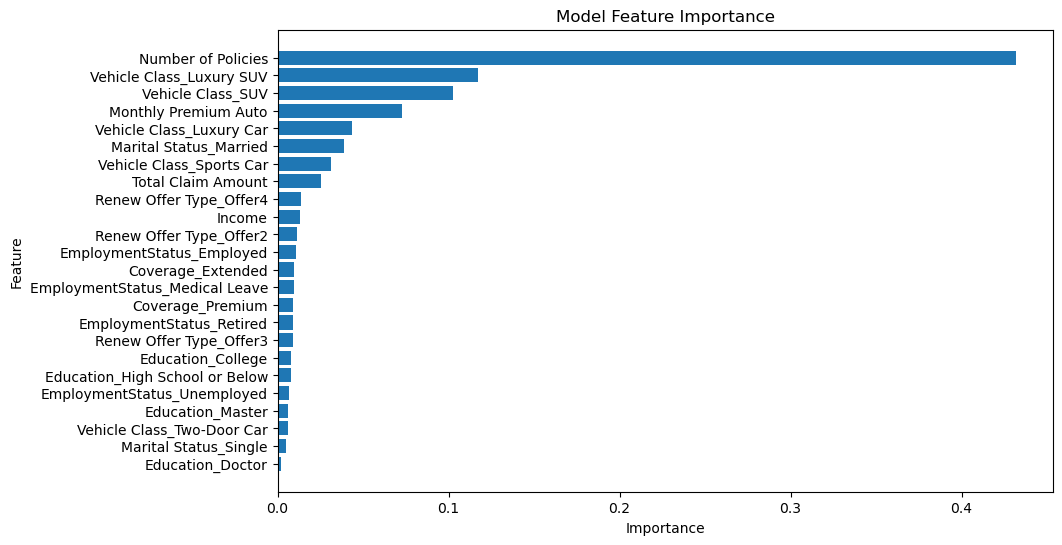

In [10]:
# Mendapatkan nama kolom dari tahap preprocessing sebelumnya
features = (list(transformer.transformers_[0][1].get_feature_names_out()) + 
            numerical_features)

# Mengumpulkan feature importance dari model yang telah dituning
feature_importance = pd.DataFrame({'feature': features, 'importance': xgb_tuning.feature_importances_})

# Sortir berdasarkan nilai kepentingan
feature_importance = feature_importance.sort_values(by='importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Model Feature Importance')
plt.gca().invert_yaxis()
plt.show()

***Confusion Matrix***

Untuk membuat confusion matrix, kita perlu menggunakan data yang telah dibagi menjadi set pelatihan dan pengujian, serta model yang telah dilatih. Biasanya, confusion matrix digunakan untuk evaluasi model klasifikasi. Karena kita sedang mengerjakan prediksi Customer Lifetime Value yang merupakan masalah regresi, confusion matrix tidak langsung berlaku. 


## Analisis Hasil


Faktor-faktor yang paling berpengaruh terhadap Customer Lifetime Value (CLV) adalah sebagai berikut:

Number of Policies: Jumlah polis yang dimiliki oleh pelanggan memiliki pengaruh terbesar terhadap nilai CLV. Ini menunjukkan bahwa semakin banyak polis yang dimiliki oleh pelanggan, semakin tinggi nilai seumur hidup pelanggan tersebut.

Monthly Premium Auto: Premi bulanan untuk asuransi mobil juga memiliki kontribusi signifikan dalam menentukan nilai CLV. Pelanggan yang membayar premi bulanan lebih tinggi cenderung memiliki nilai CLV yang lebih tinggi.

Coverage: Cakupan asuransi yang dimiliki oleh pelanggan, meskipun pengaruhnya lebih kecil dibandingkan dengan jumlah polis dan premi bulanan, tetap memiliki dampak penting pada prediksi CLV. Cakupan yang lebih luas atau lebih komprehensif dapat meningkatkan nilai CLV.

Employment Status: Status pekerjaan pelanggan (employed, unemployed, etc.) juga berpengaruh pada nilai CLV. Pelanggan dengan status pekerjaan yang stabil cenderung memiliki nilai CLV yang lebih tinggi.

Income: Pendapatan pelanggan menunjukkan korelasi dengan nilai CLV. Pelanggan dengan pendapatan yang lebih tinggi cenderung memiliki nilai CLV yang lebih tinggi.


## Rekomendasi

Untuk mengembangkan model Customer Lifetime Value (CLV) agar lebih baik lagi, berikut adalah beberapa rekomendasi yang dapat diterapkan:

1. Menambah Variabel/Fitur yang Relevan
- Pengayaan Data: Tambahkan fitur-fitur baru yang mungkin relevan seperti data demografis (usia, lokasi, pekerjaan), data perilaku (frekuensi interaksi dengan layanan), dan data finansial (kredit skor, riwayat pembayaran).
- Eksternal Data: Gunakan data eksternal seperti tren ekonomi, musim, dan data industri yang dapat memengaruhi perilaku pelanggan.

2. Penggunaan Algoritma yang Lebih Canggih
- Model Ensemble: Terapkan model ensemble seperti Random Forest, Gradient Boosting, dan XGBoost yang seringkali memberikan performa lebih baik dengan mengombinasikan beberapa model.
- Deep Learning: Eksplorasi penggunaan jaringan saraf tiruan (neural networks) untuk menangkap hubungan yang lebih kompleks antar fitur.

3. Penanganan Imbalanced Data
- Oversampling/Undersampling: Terapkan teknik oversampling pada kelas minoritas atau undersampling pada kelas mayoritas untuk mengatasi data yang tidak seimbang.
- Synthetic Data Generation: Gunakan teknik seperti SMOTE (Synthetic Minority Over-sampling Technique) untuk membuat sampel sintetis dari data kelas minoritas.

4. Validasi Model yang Lebih Robust
- Cross-Validation: Gunakan teknik cross-validation yang lebih robust seperti k-fold cross-validation untuk memastikan model tidak overfitting dan memberikan performa yang konsisten.
- Time-Series Split: Jika data memiliki komponen waktu, pertimbangkan menggunakan time-series split untuk menjaga urutan kronologis data selama validasi.

5. Monitoring dan Pemeliharaan Model
- Model Drift Monitoring: Implementasikan sistem monitoring untuk mendeteksi perubahan dalam distribusi data atau performa model seiring waktu.
- Model Retraining: Rencanakan jadwal retraining secara berkala atau berdasarkan perubahan signifikan dalam data untuk menjaga akurasi model.


### Implementasi Bisnis
1. Optimalisasi Premi Bulanan
- Rekomendasi:
- Penyesuaian Premi: Tinjau dan sesuaikan premi bulanan agar tetap kompetitif namun menguntungkan. Pertimbangkan untuk menawarkan diskon kepada pelanggan dengan CLV tinggi untuk meningkatkan loyalitas mereka.
- Segmentasi Pelanggan: Kembangkan strategi segmentasi untuk menawarkan premi yang lebih sesuai dengan profil risiko dan kebutuhan pelanggan.

2. Peningkatan Layanan Klaim
- Rekomendasi:
- Proses Klaim yang Efisien: Tingkatkan efisiensi dan kecepatan proses klaim untuk meningkatkan kepuasan pelanggan. Pelanggan yang puas cenderung memiliki CLV yang lebih tinggi.
- Program Pendidikan: Edukasi pelanggan tentang cara mengajukan klaim dan manfaat dari klaim yang tepat waktu dan akurat.

3. Program Loyalitas dan Retensi
- Rekomendasi:
- Program Loyalitas: Implementasikan program loyalitas yang memberikan insentif bagi pelanggan untuk tetap bersama perusahaan. Misalnya, poin reward yang dapat ditukar dengan layanan tambahan atau diskon premi.
- Penawaran Pembaruan: Kembangkan penawaran pembaruan yang menarik dan relevan berdasarkan analisis data pelanggan untuk meningkatkan retensi.

4. Peningkatan Kualitas Layanan
- Rekomendasi:
- Personalisasi Layanan: Gunakan data pelanggan untuk memberikan layanan yang lebih personal dan relevan. Ini bisa termasuk saran produk yang sesuai dengan kebutuhan mereka.
- Pelatihan Karyawan: Tingkatkan pelatihan karyawan untuk memastikan mereka dapat memberikan layanan pelanggan yang unggul.

5. Diversifikasi Produk dan Layanan
- Rekomendasi:
- Pengembangan Produk: Kembangkan produk dan layanan baru yang dapat memenuhi kebutuhan pelanggan yang beragam. Misalnya, asuransi untuk kendaraan mewah, asuransi perjalanan, atau produk tambahan seperti layanan roadside assistance.
- Bundle Packages: Tawarkan paket bundel yang menggabungkan beberapa produk asuransi dengan harga yang lebih kompetitif untuk meningkatkan penjualan polis.

6. Peningkatan Analisis Data
- Rekomendasi:
- Investasi dalam Teknologi: Investasi dalam teknologi analitik dan machine learning untuk lebih memahami perilaku pelanggan dan mengidentifikasi peluang peningkatan CLV.
- Monitoring Berkelanjutan: Lakukan monitoring berkelanjutan terhadap metrik CLV dan faktor-faktor yang memengaruhi untuk dapat segera mengadaptasi strategi bisnis sesuai kebutuhan.

7. Strategi Pemasaran yang Tepat
- Rekomendasi:
- Pemasaran yang Ditargetkan: Gunakan segmentasi pelanggan untuk mengembangkan kampanye pemasaran yang lebih ditargetkan dan relevan, yang akan meningkatkan efektivitas kampanye.
- Konten Edukasi: Sediakan konten edukasi yang informatif tentang manfaat produk dan layanan perusahaan untuk meningkatkan kesadaran dan pemahaman pelanggan.


### Kesimpulan

Proyek ini berhasil memprediksi Customer Lifetime Value (CLV) menggunakan model machine learning. Model XGBoost yang telah dilakukan hyperparameter tuning menunjukkan peningkatan performa yang signifikan dibandingkan dengan model sebelum tuning, dengan penurunan nilai RMSE dan MAE yang berarti, serta penurunan nilai MAPE menjadi 17.38%. Namun, model Random Forest masih menunjukkan nilai MAE yang lebih rendah dengan MAPE sebesar 12.77%, menunjukkan bahwa model ini memiliki prediksi yang lebih akurat dalam hal kesalahan absolut rata-rata.

Melalui analisis ini, kita dapat menyimpulkan bahwa faktor Number of Policies dan Monthly Premium Auto memiliki dampak terbesar terhadap nilai Customer Lifetime Value (CLV). Dengan demikian, perusahaan dapat fokus pada strategi peningkatan jumlah polis dan optimisasi premi bulanan untuk meningkatkan CLV. Selain itu, Employment Status dan Income juga perlu diperhatikan dalam strategi pemasaran dan retensi pelanggan.

Model ini dapat digunakan untuk memperkirakan nilai CLV pelanggan baru dan mengidentifikasi area-area potensial untuk meningkatkan nilai pelanggan secara keseluruhan. Perusahaan dapat terus melakukan A/B testing dan penyesuaian model untuk memastikan efektivitas prediksi dan strategi yang diterapkan.

Tidak menutup kemungkinan juga prediksinya meleset lebih jauh karena bias yang dihasilkan model masih cukup tinggi bila dilihat dari visualisasi antara nilai CLV aktual dan prediksi. Bias yang dihasilkan oleh model ini disebabkan oleh terbatasnya fitur pada dataset yang dapat merepresentasikan aspek perilaku dan preferensi pelanggan, seperti loyalitas pelanggan, pola penggunaan produk, umpan balik pelanggan, dan data perilaku relevan lainnya.


**SAVE MODEL**

In [38]:
import pickle
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

In [39]:
# Choose the best model based on your criteria (e.g., lowest RMSE)
best_model = random_search_xgb.best_estimator_  # Ensuring XGBoost is chosen

# Save the best model using pickle
pickle.dump(best_model, open('data_customer_lifetime_value.sav', 'wb'))

In [40]:
# Load model
filename = 'data_customer_lifetime_value.sav'
loaded_model = pickle.load(open(filename, 'rb'))

In [41]:
loaded_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.1, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.03, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=1, ...)